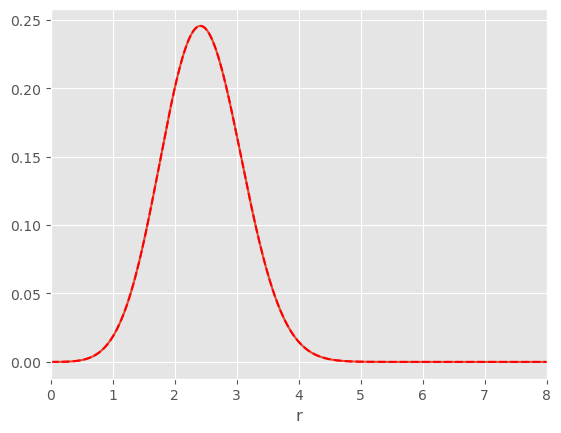

In [399]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline
mpl.style.use('ggplot')


N = 250                                                   # Truncation ordem

L0 = 2                                             # Map parameter 

col = np.cos(np.arange(2*N + 3)*math.pi /(2*N + 2))      # collocation points (Verificado)
                               
colr = col[1:N+2]                                                         # physical domain (Verificado)             

r1 = L0 * colr/(np.sqrt(1-colr**2)) 
r = np.flip(r1)                                           # physical domain (Verificado)  

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     

# Base function



psi = SB[0:N+1,:]        # origin included in psi[:,0]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]



# Initial conditions of Phi (Scalar field)                                    

r0 = 2

sigma = 1

# L0 = 1, sigma = 1/2, r0 = 0 and Phi_init = A0*r**2*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))   

#A0 =  0.1  #  0.7602785  -> disperse ;  # 0.77 -> colapse 

# L0 = 5 ,sigma = 1, r0 = 2,  Phi_init = A0*r**2*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))   

A0 =  0.05  #  0.07  -> disperse ;  # 0.1 -> colapse 

# L0 = 3 and sigma = 1/2 and Phi_init = A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))   

#A0 =  0.75981136951800  #  0.759811369518  -> disperse ;  # 0.759811369518001   -> colapse 



Phi_init = A0*r**2*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))          # Phi initial data out of origin (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_init, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.00000000000000001,8,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phiplot_init = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))     

#Phiplot_init = np.hstack((0, Phiplot_int))

Phiplot = np.dot(a0, psiplot)

plt.plot(rplot, Phiplot, rplot, Phiplot_init, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()


In [400]:
Phi

array([ 3.97882029e-16,  2.87251132e-07,  1.15287254e-06,  2.60848224e-06,
        4.67349034e-06,  7.37516915e-06,  1.07487515e-05,  1.48375577e-05,
        1.96931503e-05,  2.53755186e-05,  3.19532917e-05,  3.95039807e-05,
        4.81142511e-05,  5.78802250e-05,  6.89078142e-05,  8.13130836e-05,
        9.52226468e-05,  1.10774093e-04,  1.28116449e-04,  1.47410668e-04,
        1.68830160e-04,  1.92561353e-04,  2.18804285e-04,  2.47773242e-04,
        2.79697420e-04,  3.14821634e-04,  3.53407058e-04,  3.95732008e-04,
        4.42092759e-04,  4.92804408e-04,  5.48201766e-04,  6.08640305e-04,
        6.74497134e-04,  7.46172021e-04,  8.24088458e-04,  9.08694765e-04,
        1.00046524e-03,  1.09990133e-03,  1.20753291e-03,  1.32391948e-03,
        1.44965156e-03,  1.58535199e-03,  1.73167733e-03,  1.88931930e-03,
        2.05900627e-03,  2.24150472e-03,  2.43762080e-03,  2.64820189e-03,
        2.87413821e-03,  3.11636441e-03,  3.37586122e-03,  3.65365712e-03,
        3.95082997e-03,  

In [401]:
Phi

array([ 3.97882029e-16,  2.87251132e-07,  1.15287254e-06,  2.60848224e-06,
        4.67349034e-06,  7.37516915e-06,  1.07487515e-05,  1.48375577e-05,
        1.96931503e-05,  2.53755186e-05,  3.19532917e-05,  3.95039807e-05,
        4.81142511e-05,  5.78802250e-05,  6.89078142e-05,  8.13130836e-05,
        9.52226468e-05,  1.10774093e-04,  1.28116449e-04,  1.47410668e-04,
        1.68830160e-04,  1.92561353e-04,  2.18804285e-04,  2.47773242e-04,
        2.79697420e-04,  3.14821634e-04,  3.53407058e-04,  3.95732008e-04,
        4.42092759e-04,  4.92804408e-04,  5.48201766e-04,  6.08640305e-04,
        6.74497134e-04,  7.46172021e-04,  8.24088458e-04,  9.08694765e-04,
        1.00046524e-03,  1.09990133e-03,  1.20753291e-03,  1.32391948e-03,
        1.44965156e-03,  1.58535199e-03,  1.73167733e-03,  1.88931930e-03,
        2.05900627e-03,  2.24150472e-03,  2.43762080e-03,  2.64820189e-03,
        2.87413821e-03,  3.11636441e-03,  3.37586122e-03,  3.65365712e-03,
        3.95082997e-03,  

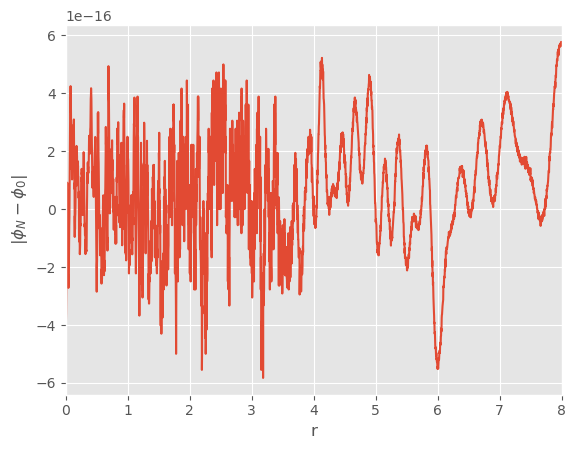

In [402]:
erro = Phiplot_init - Phiplot

plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.show()

In [403]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i] = 0.0001

coeforigin = 1/L0**2*(-(-1)**(np.arange(N+1))*(2*np.arange(1,N+2)-1)**2)    # 1/r * d\phi/dr

tol = 1e-19
#cnew = 0 
#err = abs(c0 - cnew)

n = 0
nf = 100

# Newton Raphson loop
#while max(err) >= tol:
while n <= nf:
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0_0 = 4*rrChi[0] + 8*np.dot(coeforigin,c0) + 1/2*(rPhi[0])**2
  H0_int = 4*rChi[1:N+1]**2 + 4*rrChi[1:N+1] + 8/r[1:N+1]*rChi[1:N+1] + 1/2*rPhi[1:N+1]**2
  H0 = np.hstack((H0_0, H0_int))
  J1 = rChi*rpsi
  JH_0 = 8*J1[:,0]+ 4*rrpsi[:,0] + 8*coeforigin
  JH_int = 8*J1[:,1:N+1] + 4*rrpsi[:,1:N+1] + 8/r[1:N+1]*rpsi[:,1:N+1]  
  JH = np.column_stack((JH_0, JH_int))
  inv_JH = np.linalg.inv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
  print(max(err))
  if  max(err) <= tol:
    print(c0)
    break
  n = n + 1


0.028264097892265874
0.0006405886019334624
4.255141228953763e-08
1.8388068845354155e-16
1.0408340855860843e-17
3.469446951953614e-18
3.469446951953614e-18
1.0299920638612292e-18
3.7947076036992655e-19
8.673617379884035e-19
3.469446951953614e-18
3.469446951953614e-18
3.469446951953614e-18
6.938893903907228e-18
3.469446951953614e-18
3.469446951953614e-18
1.0408340855860843e-17
6.938893903907228e-18
6.938893903907228e-18
6.938893903907228e-18
3.469446951953614e-18
6.938893903907228e-18
1.0408340855860843e-17
3.469446951953614e-18
1.0408340855860843e-17
1.0842021724855044e-19
1.0408340855860843e-17
3.469446951953614e-18
2.744386749103933e-19
3.469446951953614e-18
6.938893903907228e-18
1.0842021724855044e-19
3.469446951953614e-18
6.938893903907228e-18
3.469446951953614e-18
1.1926223897340549e-18
8.673617379884035e-19
3.469446951953614e-18
6.938893903907228e-18
8.673617379884035e-19
1.0408340855860843e-17
6.938893903907228e-18
6.938893903907228e-18
6.938893903907228e-18
6.938893903907228e-18

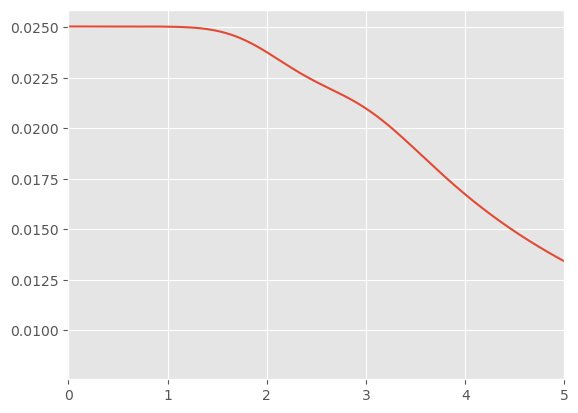

In [404]:

Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,5)
plt.show()
     

In [405]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

# In r = 0: 

SB1 = 1/2*(SB[1:(N+1),:] + SB[0:(N),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+1),:] + rSB[0:(N),:])
rrSB1 = 1/2*(rrSB[1:(N+1),:] + rrSB[0:(N),:])

# Base functions for Beta

SB2 = np.zeros([N,N+1])      
rSB2 = np.zeros([N,N+1])
rrSB2 = np.zeros([N,N+1])



for i in range(N):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  


for i in range(N):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))


for i in range(N):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)






In [406]:
np.shape(SB2)

(250, 251)

In [407]:
np.shape(SB1)

(250, 251)

In [408]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+1,Nq+1])
qrSB = np.zeros([Nq+1,Nq+1])
qrrSB = np.zeros([Nq+1,Nq+1])


for i in range(Nq+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                     

qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


qSB1 = 1/2*(qSB[1:(N+1),:] + qSB[0:(N),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+1),:] + qrSB[0:(N),:])
rrqSB1 = 1/2*(qSB[1:(N+1),:] + qrrSB[0:(N),:])




In [409]:
np.shape(qSB1)

(250, 376)

In [410]:
# Filtering

Nc = 0

Nf = N - Nc

coef_f = 36
s = 30

filter1 = np.ones(N+1)
#filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)

In [411]:
# Runge Kutta 4th order

h = 0.0002   # step size
tf = 7

It = int(tf/h)

#t1 = np.linspace(0, tf, It) 

t = 0

Madm = []
Alpha_origin = []
phi_origin = []
L2HC = []
L2MC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0

M0 = 2*np.dot(np.arange(1, 2*N + 2, 2), c0) # Madm(t = 0)


#matriz = np.concatenate((array1, array2))

while t <= tf:
   
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)      
  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)   
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC 
  

  # L2-error associated to the momentum constraint
  rqKrr = np.dot(ck0, rqSB1)  
  M = 2*rqChi*qKrr + rqKrr + 3/rq*qKrr + qPi*rqPhi*np.exp(4*qChi)
  L2MC.append((1/2*np.dot(M**2,wq_col))**1/2)    # L2 error of HC 

  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(t) + " " + str(Alpha_0))
  out_a.write(',\n')
  
  # Phi origin:  
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(t) + " " + str(phi_0))
  out_p.write(',\n')
  
  # ADM mass:
  Madm.append(2*np.dot(np.arange(1, 2*N + 2, 2), c0))

  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
#  print(t) 
#  if t > 9:
#    h=0.0001
 
    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = filter1*(b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4))
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set.append(np.dot(a0, psiplot))
  
  print('t =',t) 
    

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)
  
out_a.close()
out_p.close() 
  
t1 = np.linspace(0, tf, len(Alpha_origin)) 

t = 0.0002
t = 0.0004
t = 0.0006000000000000001
t = 0.0008
t = 0.001
t = 0.0012000000000000001
t = 0.0014000000000000002
t = 0.0016000000000000003
t = 0.0018000000000000004
t = 0.0020000000000000005
t = 0.0022000000000000006
t = 0.0024000000000000007
t = 0.0026000000000000007
t = 0.002800000000000001
t = 0.003000000000000001
t = 0.003200000000000001
t = 0.003400000000000001
t = 0.003600000000000001
t = 0.0038000000000000013
t = 0.004000000000000001
t = 0.004200000000000001
t = 0.0044
t = 0.0046
t = 0.0048
t = 0.004999999999999999
t = 0.005199999999999999
t = 0.0053999999999999986
t = 0.005599999999999998
t = 0.005799999999999998
t = 0.0059999999999999975
t = 0.006199999999999997
t = 0.006399999999999997
t = 0.0065999999999999965
t = 0.006799999999999996
t = 0.006999999999999996
t = 0.0071999999999999955
t = 0.007399999999999995
t = 0.007599999999999995
t = 0.0077999999999999944
t = 0.007999999999999995
t = 0.008199999999999995
t = 0.008399999999999996
t = 0.008599999999999997
t = 0.008

t = 0.06959999999999994
t = 0.06979999999999995
t = 0.06999999999999995
t = 0.07019999999999996
t = 0.07039999999999996
t = 0.07059999999999997
t = 0.07079999999999997
t = 0.07099999999999998
t = 0.07119999999999999
t = 0.07139999999999999
t = 0.0716
t = 0.0718
t = 0.07200000000000001
t = 0.07220000000000001
t = 0.07240000000000002
t = 0.07260000000000003
t = 0.07280000000000003
t = 0.07300000000000004
t = 0.07320000000000004
t = 0.07340000000000005
t = 0.07360000000000005
t = 0.07380000000000006
t = 0.07400000000000007
t = 0.07420000000000007
t = 0.07440000000000008
t = 0.07460000000000008
t = 0.07480000000000009
t = 0.0750000000000001
t = 0.0752000000000001
t = 0.0754000000000001
t = 0.07560000000000011
t = 0.07580000000000012
t = 0.07600000000000012
t = 0.07620000000000013
t = 0.07640000000000013
t = 0.07660000000000014
t = 0.07680000000000015
t = 0.07700000000000015
t = 0.07720000000000016
t = 0.07740000000000016
t = 0.07760000000000017
t = 0.07780000000000017
t = 0.078000000000000

t = 0.13900000000000193
t = 0.13920000000000193
t = 0.13940000000000194
t = 0.13960000000000194
t = 0.13980000000000195
t = 0.14000000000000196
t = 0.14020000000000196
t = 0.14040000000000197
t = 0.14060000000000197
t = 0.14080000000000198
t = 0.14100000000000198
t = 0.141200000000002
t = 0.141400000000002
t = 0.141600000000002
t = 0.141800000000002
t = 0.142000000000002
t = 0.14220000000000202
t = 0.14240000000000202
t = 0.14260000000000203
t = 0.14280000000000204
t = 0.14300000000000204
t = 0.14320000000000205
t = 0.14340000000000205
t = 0.14360000000000206
t = 0.14380000000000207
t = 0.14400000000000207
t = 0.14420000000000208
t = 0.14440000000000208
t = 0.1446000000000021
t = 0.1448000000000021
t = 0.1450000000000021
t = 0.1452000000000021
t = 0.1454000000000021
t = 0.14560000000000212
t = 0.14580000000000212
t = 0.14600000000000213
t = 0.14620000000000213
t = 0.14640000000000214
t = 0.14660000000000215
t = 0.14680000000000215
t = 0.14700000000000216
t = 0.14720000000000216
t = 0.1

t = 0.20900000000000393
t = 0.20920000000000394
t = 0.20940000000000394
t = 0.20960000000000395
t = 0.20980000000000396
t = 0.21000000000000396
t = 0.21020000000000397
t = 0.21040000000000397
t = 0.21060000000000398
t = 0.21080000000000398
t = 0.211000000000004
t = 0.211200000000004
t = 0.211400000000004
t = 0.211600000000004
t = 0.211800000000004
t = 0.21200000000000402
t = 0.21220000000000402
t = 0.21240000000000403
t = 0.21260000000000404
t = 0.21280000000000404
t = 0.21300000000000405
t = 0.21320000000000405
t = 0.21340000000000406
t = 0.21360000000000406
t = 0.21380000000000407
t = 0.21400000000000408
t = 0.21420000000000408
t = 0.2144000000000041
t = 0.2146000000000041
t = 0.2148000000000041
t = 0.2150000000000041
t = 0.2152000000000041
t = 0.21540000000000412
t = 0.21560000000000412
t = 0.21580000000000413
t = 0.21600000000000413
t = 0.21620000000000414
t = 0.21640000000000414
t = 0.21660000000000415
t = 0.21680000000000416
t = 0.21700000000000416
t = 0.21720000000000417
t = 0.2

t = 0.27880000000000194
t = 0.2790000000000019
t = 0.2792000000000019
t = 0.27940000000000187
t = 0.27960000000000185
t = 0.2798000000000018
t = 0.2800000000000018
t = 0.2802000000000018
t = 0.28040000000000176
t = 0.28060000000000174
t = 0.2808000000000017
t = 0.2810000000000017
t = 0.28120000000000167
t = 0.28140000000000165
t = 0.2816000000000016
t = 0.2818000000000016
t = 0.2820000000000016
t = 0.28220000000000156
t = 0.28240000000000154
t = 0.2826000000000015
t = 0.2828000000000015
t = 0.2830000000000015
t = 0.28320000000000145
t = 0.28340000000000143
t = 0.2836000000000014
t = 0.2838000000000014
t = 0.28400000000000136
t = 0.28420000000000134
t = 0.2844000000000013
t = 0.2846000000000013
t = 0.2848000000000013
t = 0.28500000000000125
t = 0.28520000000000123
t = 0.2854000000000012
t = 0.2856000000000012
t = 0.28580000000000116
t = 0.28600000000000114
t = 0.2862000000000011
t = 0.2864000000000011
t = 0.2866000000000011
t = 0.28680000000000105
t = 0.28700000000000103
t = 0.287200000

t = 0.3499999999999941
t = 0.35019999999999407
t = 0.35039999999999405
t = 0.350599999999994
t = 0.350799999999994
t = 0.350999999999994
t = 0.35119999999999396
t = 0.35139999999999394
t = 0.3515999999999939
t = 0.3517999999999939
t = 0.3519999999999939
t = 0.35219999999999385
t = 0.35239999999999383
t = 0.3525999999999938
t = 0.3527999999999938
t = 0.35299999999999376
t = 0.35319999999999374
t = 0.3533999999999937
t = 0.3535999999999937
t = 0.3537999999999937
t = 0.35399999999999365
t = 0.35419999999999363
t = 0.3543999999999936
t = 0.3545999999999936
t = 0.35479999999999356
t = 0.35499999999999354
t = 0.3551999999999935
t = 0.3553999999999935
t = 0.3555999999999935
t = 0.35579999999999345
t = 0.35599999999999343
t = 0.3561999999999934
t = 0.3563999999999934
t = 0.35659999999999337
t = 0.35679999999999334
t = 0.3569999999999933
t = 0.3571999999999933
t = 0.3573999999999933
t = 0.35759999999999326
t = 0.35779999999999323
t = 0.3579999999999932
t = 0.3581999999999932
t = 0.3583999999999

t = 0.42119999999998625
t = 0.42139999999998623
t = 0.4215999999999862
t = 0.4217999999999862
t = 0.42199999999998616
t = 0.42219999999998614
t = 0.4223999999999861
t = 0.4225999999999861
t = 0.4227999999999861
t = 0.42299999999998605
t = 0.42319999999998603
t = 0.423399999999986
t = 0.423599999999986
t = 0.42379999999998597
t = 0.42399999999998594
t = 0.4241999999999859
t = 0.4243999999999859
t = 0.4245999999999859
t = 0.42479999999998586
t = 0.42499999999998583
t = 0.4251999999999858
t = 0.4253999999999858
t = 0.42559999999998577
t = 0.42579999999998575
t = 0.4259999999999857
t = 0.4261999999999857
t = 0.4263999999999857
t = 0.42659999999998566
t = 0.42679999999998564
t = 0.4269999999999856
t = 0.4271999999999856
t = 0.42739999999998557
t = 0.42759999999998555
t = 0.4277999999999855
t = 0.4279999999999855
t = 0.4281999999999855
t = 0.42839999999998546
t = 0.42859999999998544
t = 0.4287999999999854
t = 0.4289999999999854
t = 0.42919999999998537
t = 0.42939999999998535
t = 0.4295999999

t = 0.49199999999997845
t = 0.49219999999997843
t = 0.4923999999999784
t = 0.4925999999999784
t = 0.49279999999997837
t = 0.49299999999997834
t = 0.4931999999999783
t = 0.4933999999999783
t = 0.4935999999999783
t = 0.49379999999997826
t = 0.49399999999997823
t = 0.4941999999999782
t = 0.4943999999999782
t = 0.49459999999997817
t = 0.49479999999997815
t = 0.4949999999999781
t = 0.4951999999999781
t = 0.4953999999999781
t = 0.49559999999997806
t = 0.49579999999997804
t = 0.495999999999978
t = 0.496199999999978
t = 0.49639999999997797
t = 0.49659999999997795
t = 0.4967999999999779
t = 0.4969999999999779
t = 0.4971999999999779
t = 0.49739999999997786
t = 0.49759999999997784
t = 0.4977999999999778
t = 0.4979999999999778
t = 0.49819999999997777
t = 0.49839999999997775
t = 0.4985999999999777
t = 0.4987999999999777
t = 0.4989999999999777
t = 0.49919999999997766
t = 0.49939999999997764
t = 0.4995999999999776
t = 0.4997999999999776
t = 0.4999999999999776
t = 0.5001999999999776
t = 0.500399999999

t = 0.5641999999999705
t = 0.5643999999999705
t = 0.5645999999999705
t = 0.5647999999999704
t = 0.5649999999999704
t = 0.5651999999999704
t = 0.5653999999999704
t = 0.5655999999999703
t = 0.5657999999999703
t = 0.5659999999999703
t = 0.5661999999999703
t = 0.5663999999999703
t = 0.5665999999999702
t = 0.5667999999999702
t = 0.5669999999999702
t = 0.5671999999999702
t = 0.5673999999999702
t = 0.5675999999999701
t = 0.5677999999999701
t = 0.5679999999999701
t = 0.5681999999999701
t = 0.56839999999997
t = 0.56859999999997
t = 0.56879999999997
t = 0.56899999999997
t = 0.56919999999997
t = 0.5693999999999699
t = 0.5695999999999699
t = 0.5697999999999699
t = 0.5699999999999699
t = 0.5701999999999698
t = 0.5703999999999698
t = 0.5705999999999698
t = 0.5707999999999698
t = 0.5709999999999698
t = 0.5711999999999697
t = 0.5713999999999697
t = 0.5715999999999697
t = 0.5717999999999697
t = 0.5719999999999696
t = 0.5721999999999696
t = 0.5723999999999696
t = 0.5725999999999696
t = 0.572799999999969

t = 0.6367999999999625
t = 0.6369999999999625
t = 0.6371999999999625
t = 0.6373999999999624
t = 0.6375999999999624
t = 0.6377999999999624
t = 0.6379999999999624
t = 0.6381999999999624
t = 0.6383999999999623
t = 0.6385999999999623
t = 0.6387999999999623
t = 0.6389999999999623
t = 0.6391999999999622
t = 0.6393999999999622
t = 0.6395999999999622
t = 0.6397999999999622
t = 0.6399999999999622
t = 0.6401999999999621
t = 0.6403999999999621
t = 0.6405999999999621
t = 0.6407999999999621
t = 0.640999999999962
t = 0.641199999999962
t = 0.641399999999962
t = 0.641599999999962
t = 0.641799999999962
t = 0.6419999999999619
t = 0.6421999999999619
t = 0.6423999999999619
t = 0.6425999999999619
t = 0.6427999999999618
t = 0.6429999999999618
t = 0.6431999999999618
t = 0.6433999999999618
t = 0.6435999999999618
t = 0.6437999999999617
t = 0.6439999999999617
t = 0.6441999999999617
t = 0.6443999999999617
t = 0.6445999999999616
t = 0.6447999999999616
t = 0.6449999999999616
t = 0.6451999999999616
t = 0.6453999999

t = 0.7087999999999546
t = 0.7089999999999546
t = 0.7091999999999545
t = 0.7093999999999545
t = 0.7095999999999545
t = 0.7097999999999545
t = 0.7099999999999544
t = 0.7101999999999544
t = 0.7103999999999544
t = 0.7105999999999544
t = 0.7107999999999544
t = 0.7109999999999543
t = 0.7111999999999543
t = 0.7113999999999543
t = 0.7115999999999543
t = 0.7117999999999542
t = 0.7119999999999542
t = 0.7121999999999542
t = 0.7123999999999542
t = 0.7125999999999542
t = 0.7127999999999541
t = 0.7129999999999541
t = 0.7131999999999541
t = 0.7133999999999541
t = 0.713599999999954
t = 0.713799999999954
t = 0.713999999999954
t = 0.714199999999954
t = 0.714399999999954
t = 0.7145999999999539
t = 0.7147999999999539
t = 0.7149999999999539
t = 0.7151999999999539
t = 0.7153999999999539
t = 0.7155999999999538
t = 0.7157999999999538
t = 0.7159999999999538
t = 0.7161999999999538
t = 0.7163999999999537
t = 0.7165999999999537
t = 0.7167999999999537
t = 0.7169999999999537
t = 0.7171999999999537
t = 0.7173999999

t = 0.7807999999999466
t = 0.7809999999999466
t = 0.7811999999999466
t = 0.7813999999999466
t = 0.7815999999999466
t = 0.7817999999999465
t = 0.7819999999999465
t = 0.7821999999999465
t = 0.7823999999999465
t = 0.7825999999999464
t = 0.7827999999999464
t = 0.7829999999999464
t = 0.7831999999999464
t = 0.7833999999999464
t = 0.7835999999999463
t = 0.7837999999999463
t = 0.7839999999999463
t = 0.7841999999999463
t = 0.7843999999999463
t = 0.7845999999999462
t = 0.7847999999999462
t = 0.7849999999999462
t = 0.7851999999999462
t = 0.7853999999999461
t = 0.7855999999999461
t = 0.7857999999999461
t = 0.7859999999999461
t = 0.786199999999946
t = 0.786399999999946
t = 0.786599999999946
t = 0.786799999999946
t = 0.786999999999946
t = 0.7871999999999459
t = 0.7873999999999459
t = 0.7875999999999459
t = 0.7877999999999459
t = 0.7879999999999459
t = 0.7881999999999458
t = 0.7883999999999458
t = 0.7885999999999458
t = 0.7887999999999458
t = 0.7889999999999457
t = 0.7891999999999457
t = 0.7893999999

t = 0.8529999999999387
t = 0.8531999999999387
t = 0.8533999999999387
t = 0.8535999999999386
t = 0.8537999999999386
t = 0.8539999999999386
t = 0.8541999999999386
t = 0.8543999999999385
t = 0.8545999999999385
t = 0.8547999999999385
t = 0.8549999999999385
t = 0.8551999999999385
t = 0.8553999999999384
t = 0.8555999999999384
t = 0.8557999999999384
t = 0.8559999999999384
t = 0.8561999999999383
t = 0.8563999999999383
t = 0.8565999999999383
t = 0.8567999999999383
t = 0.8569999999999383
t = 0.8571999999999382
t = 0.8573999999999382
t = 0.8575999999999382
t = 0.8577999999999382
t = 0.8579999999999381
t = 0.8581999999999381
t = 0.8583999999999381
t = 0.8585999999999381
t = 0.8587999999999381
t = 0.858999999999938
t = 0.859199999999938
t = 0.859399999999938
t = 0.859599999999938
t = 0.859799999999938
t = 0.8599999999999379
t = 0.8601999999999379
t = 0.8603999999999379
t = 0.8605999999999379
t = 0.8607999999999378
t = 0.8609999999999378
t = 0.8611999999999378
t = 0.8613999999999378
t = 0.8615999999

t = 0.9253999999999307
t = 0.9255999999999307
t = 0.9257999999999307
t = 0.9259999999999307
t = 0.9261999999999306
t = 0.9263999999999306
t = 0.9265999999999306
t = 0.9267999999999306
t = 0.9269999999999305
t = 0.9271999999999305
t = 0.9273999999999305
t = 0.9275999999999305
t = 0.9277999999999305
t = 0.9279999999999304
t = 0.9281999999999304
t = 0.9283999999999304
t = 0.9285999999999304
t = 0.9287999999999303
t = 0.9289999999999303
t = 0.9291999999999303
t = 0.9293999999999303
t = 0.9295999999999303
t = 0.9297999999999302
t = 0.9299999999999302
t = 0.9301999999999302
t = 0.9303999999999302
t = 0.9305999999999301
t = 0.9307999999999301
t = 0.9309999999999301
t = 0.9311999999999301
t = 0.9313999999999301
t = 0.93159999999993
t = 0.93179999999993
t = 0.93199999999993
t = 0.93219999999993
t = 0.93239999999993
t = 0.9325999999999299
t = 0.9327999999999299
t = 0.9329999999999299
t = 0.9331999999999299
t = 0.9333999999999298
t = 0.9335999999999298
t = 0.9337999999999298
t = 0.933999999999929

t = 0.9971999999999228
t = 0.9973999999999228
t = 0.9975999999999228
t = 0.9977999999999227
t = 0.9979999999999227
t = 0.9981999999999227
t = 0.9983999999999227
t = 0.9985999999999227
t = 0.9987999999999226
t = 0.9989999999999226
t = 0.9991999999999226
t = 0.9993999999999226
t = 0.9995999999999226
t = 0.9997999999999225
t = 0.9999999999999225
t = 1.0001999999999225
t = 1.0003999999999225
t = 1.0005999999999224
t = 1.0007999999999224
t = 1.0009999999999224
t = 1.0011999999999224
t = 1.0013999999999224
t = 1.0015999999999223
t = 1.0017999999999223
t = 1.0019999999999223
t = 1.0021999999999223
t = 1.0023999999999222
t = 1.0025999999999222
t = 1.0027999999999222
t = 1.0029999999999222
t = 1.0031999999999222
t = 1.0033999999999221
t = 1.003599999999922
t = 1.003799999999922
t = 1.003999999999922
t = 1.004199999999922
t = 1.004399999999922
t = 1.004599999999922
t = 1.004799999999922
t = 1.004999999999922
t = 1.005199999999922
t = 1.005399999999922
t = 1.005599999999922
t = 1.0057999999999219

t = 1.0697999999999148
t = 1.0699999999999148
t = 1.0701999999999148
t = 1.0703999999999148
t = 1.0705999999999147
t = 1.0707999999999147
t = 1.0709999999999147
t = 1.0711999999999147
t = 1.0713999999999146
t = 1.0715999999999146
t = 1.0717999999999146
t = 1.0719999999999146
t = 1.0721999999999146
t = 1.0723999999999145
t = 1.0725999999999145
t = 1.0727999999999145
t = 1.0729999999999145
t = 1.0731999999999144
t = 1.0733999999999144
t = 1.0735999999999144
t = 1.0737999999999144
t = 1.0739999999999144
t = 1.0741999999999143
t = 1.0743999999999143
t = 1.0745999999999143
t = 1.0747999999999143
t = 1.0749999999999142
t = 1.0751999999999142
t = 1.0753999999999142
t = 1.0755999999999142
t = 1.0757999999999142
t = 1.0759999999999141
t = 1.0761999999999141
t = 1.076399999999914
t = 1.076599999999914
t = 1.076799999999914
t = 1.076999999999914
t = 1.077199999999914
t = 1.077399999999914
t = 1.077599999999914
t = 1.077799999999914
t = 1.077999999999914
t = 1.078199999999914
t = 1.078399999999913

t = 1.1421999999999068
t = 1.1423999999999068
t = 1.1425999999999068
t = 1.1427999999999068
t = 1.1429999999999068
t = 1.1431999999999067
t = 1.1433999999999067
t = 1.1435999999999067
t = 1.1437999999999067
t = 1.1439999999999066
t = 1.1441999999999066
t = 1.1443999999999066
t = 1.1445999999999066
t = 1.1447999999999066
t = 1.1449999999999065
t = 1.1451999999999065
t = 1.1453999999999065
t = 1.1455999999999065
t = 1.1457999999999064
t = 1.1459999999999064
t = 1.1461999999999064
t = 1.1463999999999064
t = 1.1465999999999064
t = 1.1467999999999063
t = 1.1469999999999063
t = 1.1471999999999063
t = 1.1473999999999063
t = 1.1475999999999063
t = 1.1477999999999062
t = 1.1479999999999062
t = 1.1481999999999062
t = 1.1483999999999062
t = 1.1485999999999061
t = 1.1487999999999061
t = 1.148999999999906
t = 1.149199999999906
t = 1.149399999999906
t = 1.149599999999906
t = 1.149799999999906
t = 1.149999999999906
t = 1.150199999999906
t = 1.150399999999906
t = 1.150599999999906
t = 1.15079999999990

t = 1.214399999999899
t = 1.2145999999998989
t = 1.2147999999998988
t = 1.2149999999998988
t = 1.2151999999998988
t = 1.2153999999998988
t = 1.2155999999998988
t = 1.2157999999998987
t = 1.2159999999998987
t = 1.2161999999998987
t = 1.2163999999998987
t = 1.2165999999998987
t = 1.2167999999998986
t = 1.2169999999998986
t = 1.2171999999998986
t = 1.2173999999998986
t = 1.2175999999998985
t = 1.2177999999998985
t = 1.2179999999998985
t = 1.2181999999998985
t = 1.2183999999998985
t = 1.2185999999998984
t = 1.2187999999998984
t = 1.2189999999998984
t = 1.2191999999998984
t = 1.2193999999998983
t = 1.2195999999998983
t = 1.2197999999998983
t = 1.2199999999998983
t = 1.2201999999998983
t = 1.2203999999998982
t = 1.2205999999998982
t = 1.2207999999998982
t = 1.2209999999998982
t = 1.2211999999998981
t = 1.2213999999998981
t = 1.221599999999898
t = 1.221799999999898
t = 1.221999999999898
t = 1.222199999999898
t = 1.222399999999898
t = 1.222599999999898
t = 1.222799999999898
t = 1.2229999999998

t = 1.286399999999891
t = 1.286599999999891
t = 1.286799999999891
t = 1.286999999999891
t = 1.2871999999998909
t = 1.2873999999998909
t = 1.2875999999998908
t = 1.2877999999998908
t = 1.2879999999998908
t = 1.2881999999998908
t = 1.2883999999998907
t = 1.2885999999998907
t = 1.2887999999998907
t = 1.2889999999998907
t = 1.2891999999998907
t = 1.2893999999998906
t = 1.2895999999998906
t = 1.2897999999998906
t = 1.2899999999998906
t = 1.2901999999998905
t = 1.2903999999998905
t = 1.2905999999998905
t = 1.2907999999998905
t = 1.2909999999998905
t = 1.2911999999998904
t = 1.2913999999998904
t = 1.2915999999998904
t = 1.2917999999998904
t = 1.2919999999998903
t = 1.2921999999998903
t = 1.2923999999998903
t = 1.2925999999998903
t = 1.2927999999998903
t = 1.2929999999998902
t = 1.2931999999998902
t = 1.2933999999998902
t = 1.2935999999998902
t = 1.2937999999998901
t = 1.2939999999998901
t = 1.29419999999989
t = 1.29439999999989
t = 1.29459999999989
t = 1.29479999999989
t = 1.29499999999989
t 

t = 1.359199999999883
t = 1.359399999999883
t = 1.359599999999883
t = 1.3597999999998829
t = 1.3599999999998829
t = 1.3601999999998828
t = 1.3603999999998828
t = 1.3605999999998828
t = 1.3607999999998828
t = 1.3609999999998827
t = 1.3611999999998827
t = 1.3613999999998827
t = 1.3615999999998827
t = 1.3617999999998827
t = 1.3619999999998826
t = 1.3621999999998826
t = 1.3623999999998826
t = 1.3625999999998826
t = 1.3627999999998825
t = 1.3629999999998825
t = 1.3631999999998825
t = 1.3633999999998825
t = 1.3635999999998825
t = 1.3637999999998824
t = 1.3639999999998824
t = 1.3641999999998824
t = 1.3643999999998824
t = 1.3645999999998824
t = 1.3647999999998823
t = 1.3649999999998823
t = 1.3651999999998823
t = 1.3653999999998823
t = 1.3655999999998822
t = 1.3657999999998822
t = 1.3659999999998822
t = 1.3661999999998822
t = 1.3663999999998822
t = 1.3665999999998821
t = 1.366799999999882
t = 1.366999999999882
t = 1.367199999999882
t = 1.367399999999882
t = 1.367599999999882
t = 1.3677999999998

t = 1.431199999999875
t = 1.431399999999875
t = 1.431599999999875
t = 1.431799999999875
t = 1.431999999999875
t = 1.432199999999875
t = 1.4323999999998749
t = 1.4325999999998749
t = 1.4327999999998748
t = 1.4329999999998748
t = 1.4331999999998748
t = 1.4333999999998748
t = 1.4335999999998748
t = 1.4337999999998747
t = 1.4339999999998747
t = 1.4341999999998747
t = 1.4343999999998747
t = 1.4345999999998746
t = 1.4347999999998746
t = 1.4349999999998746
t = 1.4351999999998746
t = 1.4353999999998746
t = 1.4355999999998745
t = 1.4357999999998745
t = 1.4359999999998745
t = 1.4361999999998745
t = 1.4363999999998744
t = 1.4365999999998744
t = 1.4367999999998744
t = 1.4369999999998744
t = 1.4371999999998744
t = 1.4373999999998743
t = 1.4375999999998743
t = 1.4377999999998743
t = 1.4379999999998743
t = 1.4381999999998742
t = 1.4383999999998742
t = 1.4385999999998742
t = 1.4387999999998742
t = 1.4389999999998742
t = 1.4391999999998741
t = 1.4393999999998741
t = 1.439599999999874
t = 1.439799999999

t = 1.503599999999867
t = 1.503799999999867
t = 1.503999999999867
t = 1.504199999999867
t = 1.504399999999867
t = 1.504599999999867
t = 1.504799999999867
t = 1.5049999999998669
t = 1.5051999999998669
t = 1.5053999999998668
t = 1.5055999999998668
t = 1.5057999999998668
t = 1.5059999999998668
t = 1.5061999999998668
t = 1.5063999999998667
t = 1.5065999999998667
t = 1.5067999999998667
t = 1.5069999999998667
t = 1.5071999999998666
t = 1.5073999999998666
t = 1.5075999999998666
t = 1.5077999999998666
t = 1.5079999999998666
t = 1.5081999999998665
t = 1.5083999999998665
t = 1.5085999999998665
t = 1.5087999999998665
t = 1.5089999999998664
t = 1.5091999999998664
t = 1.5093999999998664
t = 1.5095999999998664
t = 1.5097999999998664
t = 1.5099999999998663
t = 1.5101999999998663
t = 1.5103999999998663
t = 1.5105999999998663
t = 1.5107999999998662
t = 1.5109999999998662
t = 1.5111999999998662
t = 1.5113999999998662
t = 1.5115999999998662
t = 1.5117999999998661
t = 1.5119999999998661
t = 1.512199999999

t = 1.576799999999859
t = 1.576999999999859
t = 1.577199999999859
t = 1.577399999999859
t = 1.577599999999859
t = 1.5777999999998589
t = 1.5779999999998588
t = 1.5781999999998588
t = 1.5783999999998588
t = 1.5785999999998588
t = 1.5787999999998588
t = 1.5789999999998587
t = 1.5791999999998587
t = 1.5793999999998587
t = 1.5795999999998587
t = 1.5797999999998587
t = 1.5799999999998586
t = 1.5801999999998586
t = 1.5803999999998586
t = 1.5805999999998586
t = 1.5807999999998585
t = 1.5809999999998585
t = 1.5811999999998585
t = 1.5813999999998585
t = 1.5815999999998585
t = 1.5817999999998584
t = 1.5819999999998584
t = 1.5821999999998584
t = 1.5823999999998584
t = 1.5825999999998583
t = 1.5827999999998583
t = 1.5829999999998583
t = 1.5831999999998583
t = 1.5833999999998583
t = 1.5835999999998582
t = 1.5837999999998582
t = 1.5839999999998582
t = 1.5841999999998582
t = 1.5843999999998581
t = 1.5845999999998581
t = 1.584799999999858
t = 1.584999999999858
t = 1.585199999999858
t = 1.5853999999998

t = 1.649199999999851
t = 1.649399999999851
t = 1.649599999999851
t = 1.649799999999851
t = 1.649999999999851
t = 1.650199999999851
t = 1.6503999999998509
t = 1.6505999999998509
t = 1.6507999999998508
t = 1.6509999999998508
t = 1.6511999999998508
t = 1.6513999999998508
t = 1.6515999999998507
t = 1.6517999999998507
t = 1.6519999999998507
t = 1.6521999999998507
t = 1.6523999999998507
t = 1.6525999999998506
t = 1.6527999999998506
t = 1.6529999999998506
t = 1.6531999999998506
t = 1.6533999999998505
t = 1.6535999999998505
t = 1.6537999999998505
t = 1.6539999999998505
t = 1.6541999999998505
t = 1.6543999999998504
t = 1.6545999999998504
t = 1.6547999999998504
t = 1.6549999999998504
t = 1.6551999999998503
t = 1.6553999999998503
t = 1.6555999999998503
t = 1.6557999999998503
t = 1.6559999999998503
t = 1.6561999999998502
t = 1.6563999999998502
t = 1.6565999999998502
t = 1.6567999999998502
t = 1.6569999999998501
t = 1.6571999999998501
t = 1.65739999999985
t = 1.65759999999985
t = 1.65779999999985


t = 1.721199999999843
t = 1.721399999999843
t = 1.721599999999843
t = 1.721799999999843
t = 1.721999999999843
t = 1.722199999999843
t = 1.722399999999843
t = 1.722599999999843
t = 1.722799999999843
t = 1.7229999999998429
t = 1.7231999999998429
t = 1.7233999999998428
t = 1.7235999999998428
t = 1.7237999999998428
t = 1.7239999999998428
t = 1.7241999999998427
t = 1.7243999999998427
t = 1.7245999999998427
t = 1.7247999999998427
t = 1.7249999999998427
t = 1.7251999999998426
t = 1.7253999999998426
t = 1.7255999999998426
t = 1.7257999999998426
t = 1.7259999999998425
t = 1.7261999999998425
t = 1.7263999999998425
t = 1.7265999999998425
t = 1.7267999999998425
t = 1.7269999999998424
t = 1.7271999999998424
t = 1.7273999999998424
t = 1.7275999999998424
t = 1.7277999999998424
t = 1.7279999999998423
t = 1.7281999999998423
t = 1.7283999999998423
t = 1.7285999999998423
t = 1.7287999999998422
t = 1.7289999999998422
t = 1.7291999999998422
t = 1.7293999999998422
t = 1.7295999999998422
t = 1.72979999999984

t = 1.7933999999998351
t = 1.793599999999835
t = 1.793799999999835
t = 1.793999999999835
t = 1.794199999999835
t = 1.794399999999835
t = 1.794599999999835
t = 1.794799999999835
t = 1.794999999999835
t = 1.795199999999835
t = 1.795399999999835
t = 1.7955999999998349
t = 1.7957999999998349
t = 1.7959999999998348
t = 1.7961999999998348
t = 1.7963999999998348
t = 1.7965999999998348
t = 1.7967999999998348
t = 1.7969999999998347
t = 1.7971999999998347
t = 1.7973999999998347
t = 1.7975999999998347
t = 1.7977999999998346
t = 1.7979999999998346
t = 1.7981999999998346
t = 1.7983999999998346
t = 1.7985999999998346
t = 1.7987999999998345
t = 1.7989999999998345
t = 1.7991999999998345
t = 1.7993999999998345
t = 1.7995999999998344
t = 1.7997999999998344
t = 1.7999999999998344
t = 1.8001999999998344
t = 1.8003999999998344
t = 1.8005999999998343
t = 1.8007999999998343
t = 1.8009999999998343
t = 1.8011999999998343
t = 1.8013999999998342
t = 1.8015999999998342
t = 1.8017999999998342
t = 1.801999999999834

t = 1.8659999999998271
t = 1.866199999999827
t = 1.866399999999827
t = 1.866599999999827
t = 1.866799999999827
t = 1.866999999999827
t = 1.867199999999827
t = 1.867399999999827
t = 1.867599999999827
t = 1.867799999999827
t = 1.867999999999827
t = 1.8681999999998269
t = 1.8683999999998269
t = 1.8685999999998268
t = 1.8687999999998268
t = 1.8689999999998268
t = 1.8691999999998268
t = 1.8693999999998268
t = 1.8695999999998267
t = 1.8697999999998267
t = 1.8699999999998267
t = 1.8701999999998267
t = 1.8703999999998266
t = 1.8705999999998266
t = 1.8707999999998266
t = 1.8709999999998266
t = 1.8711999999998266
t = 1.8713999999998265
t = 1.8715999999998265
t = 1.8717999999998265
t = 1.8719999999998265
t = 1.8721999999998264
t = 1.8723999999998264
t = 1.8725999999998264
t = 1.8727999999998264
t = 1.8729999999998264
t = 1.8731999999998263
t = 1.8733999999998263
t = 1.8735999999998263
t = 1.8737999999998263
t = 1.8739999999998262
t = 1.8741999999998262
t = 1.8743999999998262
t = 1.874599999999826

t = 1.939199999999819
t = 1.939399999999819
t = 1.939599999999819
t = 1.939799999999819
t = 1.939999999999819
t = 1.940199999999819
t = 1.940399999999819
t = 1.940599999999819
t = 1.940799999999819
t = 1.9409999999998189
t = 1.9411999999998188
t = 1.9413999999998188
t = 1.9415999999998188
t = 1.9417999999998188
t = 1.9419999999998188
t = 1.9421999999998187
t = 1.9423999999998187
t = 1.9425999999998187
t = 1.9427999999998187
t = 1.9429999999998186
t = 1.9431999999998186
t = 1.9433999999998186
t = 1.9435999999998186
t = 1.9437999999998186
t = 1.9439999999998185
t = 1.9441999999998185
t = 1.9443999999998185
t = 1.9445999999998185
t = 1.9447999999998185
t = 1.9449999999998184
t = 1.9451999999998184
t = 1.9453999999998184
t = 1.9455999999998184
t = 1.9457999999998183
t = 1.9459999999998183
t = 1.9461999999998183
t = 1.9463999999998183
t = 1.9465999999998183
t = 1.9467999999998182
t = 1.9469999999998182
t = 1.9471999999998182
t = 1.9473999999998182
t = 1.9475999999998181
t = 1.94779999999981

t = 2.0121999999998113
t = 2.0123999999998112
t = 2.012599999999811
t = 2.012799999999811
t = 2.012999999999811
t = 2.013199999999811
t = 2.013399999999811
t = 2.013599999999811
t = 2.013799999999811
t = 2.013999999999811
t = 2.014199999999811
t = 2.014399999999811
t = 2.014599999999811
t = 2.014799999999811
t = 2.014999999999811
t = 2.015199999999811
t = 2.015399999999811
t = 2.015599999999811
t = 2.015799999999811
t = 2.015999999999811
t = 2.016199999999811
t = 2.016399999999811
t = 2.0165999999998108
t = 2.0167999999998107
t = 2.0169999999998107
t = 2.0171999999998107
t = 2.0173999999998107
t = 2.0175999999998107
t = 2.0177999999998106
t = 2.0179999999998106
t = 2.0181999999998106
t = 2.0183999999998106
t = 2.0185999999998105
t = 2.0187999999998105
t = 2.0189999999998105
t = 2.0191999999998105
t = 2.0193999999998105
t = 2.0195999999998104
t = 2.0197999999998104
t = 2.0199999999998104
t = 2.0201999999998104
t = 2.0203999999998103
t = 2.0205999999998103
t = 2.0207999999998103
t = 2.02

t = 2.085599999999803
t = 2.085799999999803
t = 2.085999999999803
t = 2.086199999999803
t = 2.086399999999803
t = 2.086599999999803
t = 2.086799999999803
t = 2.086999999999803
t = 2.087199999999803
t = 2.087399999999803
t = 2.087599999999803
t = 2.087799999999803
t = 2.087999999999803
t = 2.088199999999803
t = 2.088399999999803
t = 2.088599999999803
t = 2.088799999999803
t = 2.088999999999803
t = 2.0891999999998028
t = 2.0893999999998027
t = 2.0895999999998027
t = 2.0897999999998027
t = 2.0899999999998027
t = 2.0901999999998027
t = 2.0903999999998026
t = 2.0905999999998026
t = 2.0907999999998026
t = 2.0909999999998026
t = 2.0911999999998026
t = 2.0913999999998025
t = 2.0915999999998025
t = 2.0917999999998025
t = 2.0919999999998025
t = 2.0921999999998024
t = 2.0923999999998024
t = 2.0925999999998024
t = 2.0927999999998024
t = 2.0929999999998024
t = 2.0931999999998023
t = 2.0933999999998023
t = 2.0935999999998023
t = 2.0937999999998023
t = 2.0939999999998022
t = 2.094199999999802
t = 2.0

t = 2.159399999999795
t = 2.159599999999795
t = 2.159799999999795
t = 2.159999999999795
t = 2.160199999999795
t = 2.160399999999795
t = 2.160599999999795
t = 2.160799999999795
t = 2.160999999999795
t = 2.161199999999795
t = 2.161399999999795
t = 2.161599999999795
t = 2.1617999999997948
t = 2.1619999999997948
t = 2.1621999999997947
t = 2.1623999999997947
t = 2.1625999999997947
t = 2.1627999999997947
t = 2.1629999999997946
t = 2.1631999999997946
t = 2.1633999999997946
t = 2.1635999999997946
t = 2.1637999999997946
t = 2.1639999999997945
t = 2.1641999999997945
t = 2.1643999999997945
t = 2.1645999999997945
t = 2.1647999999997944
t = 2.1649999999997944
t = 2.1651999999997944
t = 2.1653999999997944
t = 2.1655999999997944
t = 2.1657999999997943
t = 2.1659999999997943
t = 2.1661999999997943
t = 2.1663999999997943
t = 2.1665999999997942
t = 2.1667999999997942
t = 2.166999999999794
t = 2.167199999999794
t = 2.167399999999794
t = 2.167599999999794
t = 2.167799999999794
t = 2.167999999999794
t = 2.

t = 2.232399999999787
t = 2.232599999999787
t = 2.232799999999787
t = 2.232999999999787
t = 2.233199999999787
t = 2.233399999999787
t = 2.233599999999787
t = 2.233799999999787
t = 2.233999999999787
t = 2.234199999999787
t = 2.234399999999787
t = 2.2345999999997868
t = 2.2347999999997867
t = 2.2349999999997867
t = 2.2351999999997867
t = 2.2353999999997867
t = 2.2355999999997866
t = 2.2357999999997866
t = 2.2359999999997866
t = 2.2361999999997866
t = 2.2363999999997866
t = 2.2365999999997865
t = 2.2367999999997865
t = 2.2369999999997865
t = 2.2371999999997865
t = 2.2373999999997864
t = 2.2375999999997864
t = 2.2377999999997864
t = 2.2379999999997864
t = 2.2381999999997864
t = 2.2383999999997863
t = 2.2385999999997863
t = 2.2387999999997863
t = 2.2389999999997863
t = 2.2391999999997863
t = 2.2393999999997862
t = 2.239599999999786
t = 2.239799999999786
t = 2.239999999999786
t = 2.240199999999786
t = 2.240399999999786
t = 2.240599999999786
t = 2.240799999999786
t = 2.240999999999786
t = 2.2

t = 2.305399999999779
t = 2.305599999999779
t = 2.305799999999779
t = 2.305999999999779
t = 2.306199999999779
t = 2.306399999999779
t = 2.306599999999779
t = 2.306799999999779
t = 2.306999999999779
t = 2.3071999999997788
t = 2.3073999999997787
t = 2.3075999999997787
t = 2.3077999999997787
t = 2.3079999999997787
t = 2.3081999999997787
t = 2.3083999999997786
t = 2.3085999999997786
t = 2.3087999999997786
t = 2.3089999999997786
t = 2.3091999999997785
t = 2.3093999999997785
t = 2.3095999999997785
t = 2.3097999999997785
t = 2.3099999999997785
t = 2.3101999999997784
t = 2.3103999999997784
t = 2.3105999999997784
t = 2.3107999999997784
t = 2.3109999999997783
t = 2.3111999999997783
t = 2.3113999999997783
t = 2.3115999999997783
t = 2.3117999999997783
t = 2.3119999999997782
t = 2.312199999999778
t = 2.312399999999778
t = 2.312599999999778
t = 2.312799999999778
t = 2.312999999999778
t = 2.313199999999778
t = 2.313399999999778
t = 2.313599999999778
t = 2.313799999999778
t = 2.313999999999778
t = 2.3

t = 2.378799999999771
t = 2.378999999999771
t = 2.379199999999771
t = 2.379399999999771
t = 2.379599999999771
t = 2.3797999999997708
t = 2.3799999999997707
t = 2.3801999999997707
t = 2.3803999999997707
t = 2.3805999999997707
t = 2.3807999999997707
t = 2.3809999999997706
t = 2.3811999999997706
t = 2.3813999999997706
t = 2.3815999999997706
t = 2.3817999999997705
t = 2.3819999999997705
t = 2.3821999999997705
t = 2.3823999999997705
t = 2.3825999999997705
t = 2.3827999999997704
t = 2.3829999999997704
t = 2.3831999999997704
t = 2.3833999999997704
t = 2.3835999999997703
t = 2.3837999999997703
t = 2.3839999999997703
t = 2.3841999999997703
t = 2.3843999999997703
t = 2.3845999999997702
t = 2.38479999999977
t = 2.38499999999977
t = 2.38519999999977
t = 2.38539999999977
t = 2.38559999999977
t = 2.38579999999977
t = 2.38599999999977
t = 2.38619999999977
t = 2.38639999999977
t = 2.38659999999977
t = 2.38679999999977
t = 2.38699999999977
t = 2.38719999999977
t = 2.38739999999977
t = 2.38759999999977


t = 2.452199999999763
t = 2.4523999999997628
t = 2.4525999999997627
t = 2.4527999999997627
t = 2.4529999999997627
t = 2.4531999999997627
t = 2.4533999999997627
t = 2.4535999999997626
t = 2.4537999999997626
t = 2.4539999999997626
t = 2.4541999999997626
t = 2.4543999999997625
t = 2.4545999999997625
t = 2.4547999999997625
t = 2.4549999999997625
t = 2.4551999999997625
t = 2.4553999999997624
t = 2.4555999999997624
t = 2.4557999999997624
t = 2.4559999999997624
t = 2.4561999999997624
t = 2.4563999999997623
t = 2.4565999999997623
t = 2.4567999999997623
t = 2.4569999999997623
t = 2.4571999999997622
t = 2.457399999999762
t = 2.457599999999762
t = 2.457799999999762
t = 2.457999999999762
t = 2.458199999999762
t = 2.458399999999762
t = 2.458599999999762
t = 2.458799999999762
t = 2.458999999999762
t = 2.459199999999762
t = 2.459399999999762
t = 2.459599999999762
t = 2.459799999999762
t = 2.459999999999762
t = 2.460199999999762
t = 2.460399999999762
t = 2.460599999999762
t = 2.460799999999762
t = 2.4

t = 2.5259999999997547
t = 2.5261999999997546
t = 2.5263999999997546
t = 2.5265999999997546
t = 2.5267999999997546
t = 2.5269999999997546
t = 2.5271999999997545
t = 2.5273999999997545
t = 2.5275999999997545
t = 2.5277999999997545
t = 2.5279999999997544
t = 2.5281999999997544
t = 2.5283999999997544
t = 2.5285999999997544
t = 2.5287999999997544
t = 2.5289999999997543
t = 2.5291999999997543
t = 2.5293999999997543
t = 2.5295999999997543
t = 2.5297999999997542
t = 2.5299999999997542
t = 2.530199999999754
t = 2.530399999999754
t = 2.530599999999754
t = 2.530799999999754
t = 2.530999999999754
t = 2.531199999999754
t = 2.531399999999754
t = 2.531599999999754
t = 2.531799999999754
t = 2.531999999999754
t = 2.532199999999754
t = 2.532399999999754
t = 2.532599999999754
t = 2.532799999999754
t = 2.532999999999754
t = 2.533199999999754
t = 2.533399999999754
t = 2.533599999999754
t = 2.533799999999754
t = 2.533999999999754
t = 2.5341999999997538
t = 2.5343999999997537
t = 2.5345999999997537
t = 2.53

t = 2.5995999999997466
t = 2.5997999999997465
t = 2.5999999999997465
t = 2.6001999999997465
t = 2.6003999999997465
t = 2.6005999999997464
t = 2.6007999999997464
t = 2.6009999999997464
t = 2.6011999999997464
t = 2.6013999999997464
t = 2.6015999999997463
t = 2.6017999999997463
t = 2.6019999999997463
t = 2.6021999999997463
t = 2.6023999999997462
t = 2.6025999999997462
t = 2.602799999999746
t = 2.602999999999746
t = 2.603199999999746
t = 2.603399999999746
t = 2.603599999999746
t = 2.603799999999746
t = 2.603999999999746
t = 2.604199999999746
t = 2.604399999999746
t = 2.604599999999746
t = 2.604799999999746
t = 2.604999999999746
t = 2.605199999999746
t = 2.605399999999746
t = 2.605599999999746
t = 2.605799999999746
t = 2.605999999999746
t = 2.606199999999746
t = 2.606399999999746
t = 2.606599999999746
t = 2.6067999999997458
t = 2.6069999999997457
t = 2.6071999999997457
t = 2.6073999999997457
t = 2.6075999999997457
t = 2.6077999999997457
t = 2.6079999999997456
t = 2.6081999999997456
t = 2.60

t = 2.6725999999997385
t = 2.6727999999997385
t = 2.6729999999997385
t = 2.6731999999997385
t = 2.6733999999997384
t = 2.6735999999997384
t = 2.6737999999997384
t = 2.6739999999997384
t = 2.6741999999997383
t = 2.6743999999997383
t = 2.6745999999997383
t = 2.6747999999997383
t = 2.6749999999997383
t = 2.6751999999997382
t = 2.675399999999738
t = 2.675599999999738
t = 2.675799999999738
t = 2.675999999999738
t = 2.676199999999738
t = 2.676399999999738
t = 2.676599999999738
t = 2.676799999999738
t = 2.676999999999738
t = 2.677199999999738
t = 2.677399999999738
t = 2.677599999999738
t = 2.677799999999738
t = 2.677999999999738
t = 2.678199999999738
t = 2.678399999999738
t = 2.678599999999738
t = 2.678799999999738
t = 2.678999999999738
t = 2.679199999999738
t = 2.6793999999997378
t = 2.6795999999997377
t = 2.6797999999997377
t = 2.6799999999997377
t = 2.6801999999997377
t = 2.6803999999997377
t = 2.6805999999997376
t = 2.6807999999997376
t = 2.6809999999997376
t = 2.6811999999997376
t = 2.68

t = 2.7459999999997304
t = 2.7461999999997304
t = 2.7463999999997304
t = 2.7465999999997304
t = 2.7467999999997303
t = 2.7469999999997303
t = 2.7471999999997303
t = 2.7473999999997303
t = 2.7475999999997303
t = 2.7477999999997302
t = 2.74799999999973
t = 2.74819999999973
t = 2.74839999999973
t = 2.74859999999973
t = 2.74879999999973
t = 2.74899999999973
t = 2.74919999999973
t = 2.74939999999973
t = 2.74959999999973
t = 2.74979999999973
t = 2.74999999999973
t = 2.75019999999973
t = 2.75039999999973
t = 2.75059999999973
t = 2.75079999999973
t = 2.75099999999973
t = 2.75119999999973
t = 2.75139999999973
t = 2.75159999999973
t = 2.75179999999973
t = 2.7519999999997298
t = 2.7521999999997298
t = 2.7523999999997297
t = 2.7525999999997297
t = 2.7527999999997297
t = 2.7529999999997297
t = 2.7531999999997296
t = 2.7533999999997296
t = 2.7535999999997296
t = 2.7537999999997296
t = 2.7539999999997296
t = 2.7541999999997295
t = 2.7543999999997295
t = 2.7545999999997295
t = 2.7547999999997295
t = 2

t = 2.8197999999997223
t = 2.8199999999997223
t = 2.8201999999997223
t = 2.8203999999997222
t = 2.820599999999722
t = 2.820799999999722
t = 2.820999999999722
t = 2.821199999999722
t = 2.821399999999722
t = 2.821599999999722
t = 2.821799999999722
t = 2.821999999999722
t = 2.822199999999722
t = 2.822399999999722
t = 2.822599999999722
t = 2.822799999999722
t = 2.822999999999722
t = 2.823199999999722
t = 2.823399999999722
t = 2.823599999999722
t = 2.823799999999722
t = 2.823999999999722
t = 2.824199999999722
t = 2.824399999999722
t = 2.8245999999997218
t = 2.8247999999997218
t = 2.8249999999997217
t = 2.8251999999997217
t = 2.8253999999997217
t = 2.8255999999997217
t = 2.8257999999997216
t = 2.8259999999997216
t = 2.8261999999997216
t = 2.8263999999997216
t = 2.8265999999997216
t = 2.8267999999997215
t = 2.8269999999997215
t = 2.8271999999997215
t = 2.8273999999997215
t = 2.8275999999997214
t = 2.8277999999997214
t = 2.8279999999997214
t = 2.8281999999997214
t = 2.8283999999997214
t = 2.82

t = 2.893399999999714
t = 2.893599999999714
t = 2.893799999999714
t = 2.893999999999714
t = 2.894199999999714
t = 2.894399999999714
t = 2.894599999999714
t = 2.894799999999714
t = 2.894999999999714
t = 2.895199999999714
t = 2.895399999999714
t = 2.895599999999714
t = 2.895799999999714
t = 2.895999999999714
t = 2.896199999999714
t = 2.896399999999714
t = 2.896599999999714
t = 2.896799999999714
t = 2.896999999999714
t = 2.897199999999714
t = 2.8973999999997138
t = 2.8975999999997137
t = 2.8977999999997137
t = 2.8979999999997137
t = 2.8981999999997137
t = 2.8983999999997136
t = 2.8985999999997136
t = 2.8987999999997136
t = 2.8989999999997136
t = 2.8991999999997136
t = 2.8993999999997135
t = 2.8995999999997135
t = 2.8997999999997135
t = 2.8999999999997135
t = 2.9001999999997135
t = 2.9003999999997134
t = 2.9005999999997134
t = 2.9007999999997134
t = 2.9009999999997134
t = 2.9011999999997133
t = 2.9013999999997133
t = 2.9015999999997133
t = 2.9017999999997133
t = 2.9019999999997133
t = 2.90

t = 2.966799999999706
t = 2.966999999999706
t = 2.967199999999706
t = 2.967399999999706
t = 2.967599999999706
t = 2.967799999999706
t = 2.967999999999706
t = 2.968199999999706
t = 2.968399999999706
t = 2.968599999999706
t = 2.968799999999706
t = 2.968999999999706
t = 2.969199999999706
t = 2.969399999999706
t = 2.969599999999706
t = 2.969799999999706
t = 2.9699999999997058
t = 2.9701999999997057
t = 2.9703999999997057
t = 2.9705999999997057
t = 2.9707999999997057
t = 2.9709999999997057
t = 2.9711999999997056
t = 2.9713999999997056
t = 2.9715999999997056
t = 2.9717999999997056
t = 2.9719999999997055
t = 2.9721999999997055
t = 2.9723999999997055
t = 2.9725999999997055
t = 2.9727999999997055
t = 2.9729999999997054
t = 2.9731999999997054
t = 2.9733999999997054
t = 2.9735999999997054
t = 2.9737999999997053
t = 2.9739999999997053
t = 2.9741999999997053
t = 2.9743999999997053
t = 2.9745999999997053
t = 2.9747999999997052
t = 2.974999999999705
t = 2.975199999999705
t = 2.975399999999705
t = 2.9

t = 3.040199999999698
t = 3.040399999999698
t = 3.040599999999698
t = 3.040799999999698
t = 3.040999999999698
t = 3.041199999999698
t = 3.041399999999698
t = 3.041599999999698
t = 3.041799999999698
t = 3.041999999999698
t = 3.042199999999698
t = 3.042399999999698
t = 3.0425999999996978
t = 3.0427999999996977
t = 3.0429999999996977
t = 3.0431999999996977
t = 3.0433999999996977
t = 3.0435999999996977
t = 3.0437999999996976
t = 3.0439999999996976
t = 3.0441999999996976
t = 3.0443999999996976
t = 3.0445999999996975
t = 3.0447999999996975
t = 3.0449999999996975
t = 3.0451999999996975
t = 3.0453999999996975
t = 3.0455999999996974
t = 3.0457999999996974
t = 3.0459999999996974
t = 3.0461999999996974
t = 3.0463999999996974
t = 3.0465999999996973
t = 3.0467999999996973
t = 3.0469999999996973
t = 3.0471999999996973
t = 3.0473999999996972
t = 3.047599999999697
t = 3.047799999999697
t = 3.047999999999697
t = 3.048199999999697
t = 3.048399999999697
t = 3.048599999999697
t = 3.048799999999697
t = 3.0

t = 3.11379999999969
t = 3.11399999999969
t = 3.11419999999969
t = 3.11439999999969
t = 3.11459999999969
t = 3.11479999999969
t = 3.11499999999969
t = 3.1151999999996898
t = 3.1153999999996898
t = 3.1155999999996897
t = 3.1157999999996897
t = 3.1159999999996897
t = 3.1161999999996897
t = 3.1163999999996896
t = 3.1165999999996896
t = 3.1167999999996896
t = 3.1169999999996896
t = 3.1171999999996896
t = 3.1173999999996895
t = 3.1175999999996895
t = 3.1177999999996895
t = 3.1179999999996895
t = 3.1181999999996894
t = 3.1183999999996894
t = 3.1185999999996894
t = 3.1187999999996894
t = 3.1189999999996894
t = 3.1191999999996893
t = 3.1193999999996893
t = 3.1195999999996893
t = 3.1197999999996893
t = 3.1199999999996892
t = 3.1201999999996892
t = 3.120399999999689
t = 3.120599999999689
t = 3.120799999999689
t = 3.120999999999689
t = 3.121199999999689
t = 3.121399999999689
t = 3.121599999999689
t = 3.121799999999689
t = 3.121999999999689
t = 3.122199999999689
t = 3.122399999999689
t = 3.1225999

t = 3.186799999999682
t = 3.186999999999682
t = 3.187199999999682
t = 3.187399999999682
t = 3.187599999999682
t = 3.1877999999996818
t = 3.1879999999996818
t = 3.1881999999996817
t = 3.1883999999996817
t = 3.1885999999996817
t = 3.1887999999996817
t = 3.1889999999996816
t = 3.1891999999996816
t = 3.1893999999996816
t = 3.1895999999996816
t = 3.1897999999996816
t = 3.1899999999996815
t = 3.1901999999996815
t = 3.1903999999996815
t = 3.1905999999996815
t = 3.1907999999996814
t = 3.1909999999996814
t = 3.1911999999996814
t = 3.1913999999996814
t = 3.1915999999996814
t = 3.1917999999996813
t = 3.1919999999996813
t = 3.1921999999996813
t = 3.1923999999996813
t = 3.1925999999996812
t = 3.1927999999996812
t = 3.192999999999681
t = 3.193199999999681
t = 3.193399999999681
t = 3.193599999999681
t = 3.193799999999681
t = 3.193999999999681
t = 3.194199999999681
t = 3.194399999999681
t = 3.194599999999681
t = 3.194799999999681
t = 3.194999999999681
t = 3.195199999999681
t = 3.195399999999681
t = 3.

t = 3.260399999999674
t = 3.2605999999996738
t = 3.2607999999996737
t = 3.2609999999996737
t = 3.2611999999996737
t = 3.2613999999996737
t = 3.2615999999996736
t = 3.2617999999996736
t = 3.2619999999996736
t = 3.2621999999996736
t = 3.2623999999996736
t = 3.2625999999996735
t = 3.2627999999996735
t = 3.2629999999996735
t = 3.2631999999996735
t = 3.2633999999996735
t = 3.2635999999996734
t = 3.2637999999996734
t = 3.2639999999996734
t = 3.2641999999996734
t = 3.2643999999996733
t = 3.2645999999996733
t = 3.2647999999996733
t = 3.2649999999996733
t = 3.2651999999996733
t = 3.2653999999996732
t = 3.265599999999673
t = 3.265799999999673
t = 3.265999999999673
t = 3.266199999999673
t = 3.266399999999673
t = 3.266599999999673
t = 3.266799999999673
t = 3.266999999999673
t = 3.267199999999673
t = 3.267399999999673
t = 3.267599999999673
t = 3.267799999999673
t = 3.267999999999673
t = 3.268199999999673
t = 3.268399999999673
t = 3.268599999999673
t = 3.268799999999673
t = 3.268999999999673
t = 3.2

t = 3.3333999999996657
t = 3.3335999999996657
t = 3.3337999999996657
t = 3.3339999999996657
t = 3.3341999999996657
t = 3.3343999999996656
t = 3.3345999999996656
t = 3.3347999999996656
t = 3.3349999999996656
t = 3.3351999999996655
t = 3.3353999999996655
t = 3.3355999999996655
t = 3.3357999999996655
t = 3.3359999999996655
t = 3.3361999999996654
t = 3.3363999999996654
t = 3.3365999999996654
t = 3.3367999999996654
t = 3.3369999999996653
t = 3.3371999999996653
t = 3.3373999999996653
t = 3.3375999999996653
t = 3.3377999999996653
t = 3.3379999999996652
t = 3.338199999999665
t = 3.338399999999665
t = 3.338599999999665
t = 3.338799999999665
t = 3.338999999999665
t = 3.339199999999665
t = 3.339399999999665
t = 3.339599999999665
t = 3.339799999999665
t = 3.339999999999665
t = 3.340199999999665
t = 3.340399999999665
t = 3.340599999999665
t = 3.340799999999665
t = 3.340999999999665
t = 3.341199999999665
t = 3.341399999999665
t = 3.341599999999665
t = 3.341799999999665
t = 3.341999999999665
t = 3.34

t = 3.4071999999996576
t = 3.4073999999996576
t = 3.4075999999996576
t = 3.4077999999996575
t = 3.4079999999996575
t = 3.4081999999996575
t = 3.4083999999996575
t = 3.4085999999996575
t = 3.4087999999996574
t = 3.4089999999996574
t = 3.4091999999996574
t = 3.4093999999996574
t = 3.4095999999996573
t = 3.4097999999996573
t = 3.4099999999996573
t = 3.4101999999996573
t = 3.4103999999996573
t = 3.4105999999996572
t = 3.410799999999657
t = 3.410999999999657
t = 3.411199999999657
t = 3.411399999999657
t = 3.411599999999657
t = 3.411799999999657
t = 3.411999999999657
t = 3.412199999999657
t = 3.412399999999657
t = 3.412599999999657
t = 3.412799999999657
t = 3.412999999999657
t = 3.413199999999657
t = 3.413399999999657
t = 3.413599999999657
t = 3.413799999999657
t = 3.413999999999657
t = 3.414199999999657
t = 3.414399999999657
t = 3.414599999999657
t = 3.4147999999996568
t = 3.4149999999996568
t = 3.4151999999996567
t = 3.4153999999996567
t = 3.4155999999996567
t = 3.4157999999996567
t = 3.41

t = 3.4801999999996496
t = 3.4803999999996496
t = 3.4805999999996495
t = 3.4807999999996495
t = 3.4809999999996495
t = 3.4811999999996495
t = 3.4813999999996494
t = 3.4815999999996494
t = 3.4817999999996494
t = 3.4819999999996494
t = 3.4821999999996494
t = 3.4823999999996493
t = 3.4825999999996493
t = 3.4827999999996493
t = 3.4829999999996493
t = 3.4831999999996492
t = 3.483399999999649
t = 3.483599999999649
t = 3.483799999999649
t = 3.483999999999649
t = 3.484199999999649
t = 3.484399999999649
t = 3.484599999999649
t = 3.484799999999649
t = 3.484999999999649
t = 3.485199999999649
t = 3.485399999999649
t = 3.485599999999649
t = 3.485799999999649
t = 3.485999999999649
t = 3.486199999999649
t = 3.486399999999649
t = 3.486599999999649
t = 3.486799999999649
t = 3.486999999999649
t = 3.487199999999649
t = 3.487399999999649
t = 3.4875999999996488
t = 3.4877999999996487
t = 3.4879999999996487
t = 3.4881999999996487
t = 3.4883999999996487
t = 3.4885999999996486
t = 3.4887999999996486
t = 3.488

t = 3.5531999999996415
t = 3.5533999999996415
t = 3.5535999999996415
t = 3.5537999999996415
t = 3.5539999999996414
t = 3.5541999999996414
t = 3.5543999999996414
t = 3.5545999999996414
t = 3.5547999999996414
t = 3.5549999999996413
t = 3.5551999999996413
t = 3.5553999999996413
t = 3.5555999999996413
t = 3.5557999999996412
t = 3.5559999999996412
t = 3.556199999999641
t = 3.556399999999641
t = 3.556599999999641
t = 3.556799999999641
t = 3.556999999999641
t = 3.557199999999641
t = 3.557399999999641
t = 3.557599999999641
t = 3.557799999999641
t = 3.557999999999641
t = 3.558199999999641
t = 3.558399999999641
t = 3.558599999999641
t = 3.558799999999641
t = 3.558999999999641
t = 3.559199999999641
t = 3.559399999999641
t = 3.559599999999641
t = 3.559799999999641
t = 3.559999999999641
t = 3.5601999999996408
t = 3.5603999999996407
t = 3.5605999999996407
t = 3.5607999999996407
t = 3.5609999999996407
t = 3.5611999999996407
t = 3.5613999999996406
t = 3.5615999999996406
t = 3.5617999999996406
t = 3.56

t = 3.6261999999996335
t = 3.6263999999996335
t = 3.6265999999996335
t = 3.6267999999996334
t = 3.6269999999996334
t = 3.6271999999996334
t = 3.6273999999996334
t = 3.6275999999996333
t = 3.6277999999996333
t = 3.6279999999996333
t = 3.6281999999996333
t = 3.6283999999996333
t = 3.6285999999996332
t = 3.628799999999633
t = 3.628999999999633
t = 3.629199999999633
t = 3.629399999999633
t = 3.629599999999633
t = 3.629799999999633
t = 3.629999999999633
t = 3.630199999999633
t = 3.630399999999633
t = 3.630599999999633
t = 3.630799999999633
t = 3.630999999999633
t = 3.631199999999633
t = 3.631399999999633
t = 3.631599999999633
t = 3.631799999999633
t = 3.631999999999633
t = 3.632199999999633
t = 3.632399999999633
t = 3.632599999999633
t = 3.6327999999996328
t = 3.6329999999996327
t = 3.6331999999996327
t = 3.6333999999996327
t = 3.6335999999996327
t = 3.6337999999996327
t = 3.6339999999996326
t = 3.6341999999996326
t = 3.6343999999996326
t = 3.6345999999996326
t = 3.6347999999996325
t = 3.63

t = 3.6991999999996255
t = 3.6993999999996254
t = 3.6995999999996254
t = 3.6997999999996254
t = 3.6999999999996254
t = 3.7001999999996253
t = 3.7003999999996253
t = 3.7005999999996253
t = 3.7007999999996253
t = 3.7009999999996253
t = 3.7011999999996252
t = 3.701399999999625
t = 3.701599999999625
t = 3.701799999999625
t = 3.701999999999625
t = 3.702199999999625
t = 3.702399999999625
t = 3.702599999999625
t = 3.702799999999625
t = 3.702999999999625
t = 3.703199999999625
t = 3.703399999999625
t = 3.703599999999625
t = 3.703799999999625
t = 3.703999999999625
t = 3.704199999999625
t = 3.704399999999625
t = 3.704599999999625
t = 3.704799999999625
t = 3.704999999999625
t = 3.705199999999625
t = 3.7053999999996248
t = 3.7055999999996247
t = 3.7057999999996247
t = 3.7059999999996247
t = 3.7061999999996247
t = 3.7063999999996247
t = 3.7065999999996246
t = 3.7067999999996246
t = 3.7069999999996246
t = 3.7071999999996246
t = 3.7073999999996246
t = 3.7075999999996245
t = 3.7077999999996245
t = 3.70

t = 3.7729999999996173
t = 3.7731999999996173
t = 3.7733999999996173
t = 3.7735999999996173
t = 3.7737999999996172
t = 3.773999999999617
t = 3.774199999999617
t = 3.774399999999617
t = 3.774599999999617
t = 3.774799999999617
t = 3.774999999999617
t = 3.775199999999617
t = 3.775399999999617
t = 3.775599999999617
t = 3.775799999999617
t = 3.775999999999617
t = 3.776199999999617
t = 3.776399999999617
t = 3.776599999999617
t = 3.776799999999617
t = 3.776999999999617
t = 3.777199999999617
t = 3.777399999999617
t = 3.777599999999617
t = 3.777799999999617
t = 3.7779999999996168
t = 3.7781999999996168
t = 3.7783999999996167
t = 3.7785999999996167
t = 3.7787999999996167
t = 3.7789999999996167
t = 3.7791999999996166
t = 3.7793999999996166
t = 3.7795999999996166
t = 3.7797999999996166
t = 3.7799999999996166
t = 3.7801999999996165
t = 3.7803999999996165
t = 3.7805999999996165
t = 3.7807999999996165
t = 3.7809999999996164
t = 3.7811999999996164
t = 3.7813999999996164
t = 3.7815999999996164
t = 3.78

t = 3.8463999999996092
t = 3.846599999999609
t = 3.846799999999609
t = 3.846999999999609
t = 3.847199999999609
t = 3.847399999999609
t = 3.847599999999609
t = 3.847799999999609
t = 3.847999999999609
t = 3.848199999999609
t = 3.848399999999609
t = 3.848599999999609
t = 3.848799999999609
t = 3.848999999999609
t = 3.849199999999609
t = 3.849399999999609
t = 3.849599999999609
t = 3.849799999999609
t = 3.849999999999609
t = 3.850199999999609
t = 3.850399999999609
t = 3.850599999999609
t = 3.8507999999996088
t = 3.8509999999996087
t = 3.8511999999996087
t = 3.8513999999996087
t = 3.8515999999996087
t = 3.8517999999996086
t = 3.8519999999996086
t = 3.8521999999996086
t = 3.8523999999996086
t = 3.8525999999996086
t = 3.8527999999996085
t = 3.8529999999996085
t = 3.8531999999996085
t = 3.8533999999996085
t = 3.8535999999996084
t = 3.8537999999996084
t = 3.8539999999996084
t = 3.8541999999996084
t = 3.8543999999996084
t = 3.8545999999996083
t = 3.8547999999996083
t = 3.8549999999996083
t = 3.855

t = 3.919599999999601
t = 3.919799999999601
t = 3.919999999999601
t = 3.920199999999601
t = 3.920399999999601
t = 3.920599999999601
t = 3.920799999999601
t = 3.920999999999601
t = 3.921199999999601
t = 3.921399999999601
t = 3.921599999999601
t = 3.921799999999601
t = 3.921999999999601
t = 3.922199999999601
t = 3.922399999999601
t = 3.922599999999601
t = 3.922799999999601
t = 3.922999999999601
t = 3.923199999999601
t = 3.9233999999996008
t = 3.9235999999996007
t = 3.9237999999996007
t = 3.9239999999996007
t = 3.9241999999996007
t = 3.9243999999996007
t = 3.9245999999996006
t = 3.9247999999996006
t = 3.9249999999996006
t = 3.9251999999996006
t = 3.9253999999996005
t = 3.9255999999996005
t = 3.9257999999996005
t = 3.9259999999996005
t = 3.9261999999996005
t = 3.9263999999996004
t = 3.9265999999996004
t = 3.9267999999996004
t = 3.9269999999996004
t = 3.9271999999996003
t = 3.9273999999996003
t = 3.9275999999996003
t = 3.9277999999996003
t = 3.9279999999996003
t = 3.9281999999996002
t = 3.9

t = 3.993599999999593
t = 3.993799999999593
t = 3.993999999999593
t = 3.994199999999593
t = 3.994399999999593
t = 3.994599999999593
t = 3.994799999999593
t = 3.994999999999593
t = 3.995199999999593
t = 3.995399999999593
t = 3.995599999999593
t = 3.995799999999593
t = 3.9959999999995928
t = 3.9961999999995927
t = 3.9963999999995927
t = 3.9965999999995927
t = 3.9967999999995927
t = 3.9969999999995927
t = 3.9971999999995926
t = 3.9973999999995926
t = 3.9975999999995926
t = 3.9977999999995926
t = 3.9979999999995925
t = 3.9981999999995925
t = 3.9983999999995925
t = 3.9985999999995925
t = 3.9987999999995925
t = 3.9989999999995924
t = 3.9991999999995924
t = 3.9993999999995924
t = 3.9995999999995924
t = 3.9997999999995923
t = 3.9999999999995923
t = 4.000199999999593
t = 4.000399999999593
t = 4.000599999999594
t = 4.000799999999594
t = 4.000999999999594
t = 4.001199999999595
t = 4.001399999999595
t = 4.001599999999596
t = 4.001799999999596
t = 4.0019999999995965
t = 4.002199999999597
t = 4.0023

t = 4.068199999999736
t = 4.068399999999737
t = 4.068599999999737
t = 4.0687999999997375
t = 4.068999999999738
t = 4.069199999999738
t = 4.069399999999739
t = 4.069599999999739
t = 4.06979999999974
t = 4.06999999999974
t = 4.0701999999997405
t = 4.070399999999741
t = 4.070599999999741
t = 4.070799999999742
t = 4.070999999999742
t = 4.071199999999743
t = 4.071399999999743
t = 4.071599999999743
t = 4.071799999999744
t = 4.071999999999744
t = 4.072199999999745
t = 4.072399999999745
t = 4.0725999999997455
t = 4.072799999999746
t = 4.072999999999746
t = 4.073199999999747
t = 4.073399999999747
t = 4.073599999999748
t = 4.073799999999748
t = 4.0739999999997485
t = 4.074199999999749
t = 4.074399999999749
t = 4.07459999999975
t = 4.07479999999975
t = 4.074999999999751
t = 4.075199999999751
t = 4.075399999999751
t = 4.075599999999752
t = 4.075799999999752
t = 4.075999999999753
t = 4.076199999999753
t = 4.0763999999997536
t = 4.076599999999754
t = 4.076799999999754
t = 4.076999999999755
t = 4.077

t = 4.1431999999998945
t = 4.143399999999895
t = 4.143599999999895
t = 4.143799999999896
t = 4.143999999999896
t = 4.144199999999897
t = 4.144399999999897
t = 4.1445999999998975
t = 4.144799999999898
t = 4.144999999999898
t = 4.145199999999899
t = 4.145399999999899
t = 4.1455999999999
t = 4.1457999999999
t = 4.1459999999999
t = 4.146199999999901
t = 4.146399999999901
t = 4.146599999999902
t = 4.146799999999902
t = 4.1469999999999025
t = 4.147199999999903
t = 4.147399999999903
t = 4.147599999999904
t = 4.147799999999904
t = 4.147999999999905
t = 4.148199999999905
t = 4.1483999999999055
t = 4.148599999999906
t = 4.148799999999906
t = 4.148999999999907
t = 4.149199999999907
t = 4.149399999999908
t = 4.149599999999908
t = 4.1497999999999085
t = 4.149999999999909
t = 4.150199999999909
t = 4.15039999999991
t = 4.15059999999991
t = 4.150799999999911
t = 4.150999999999911
t = 4.151199999999911
t = 4.151399999999912
t = 4.151599999999912
t = 4.151799999999913
t = 4.151999999999913
t = 4.1521999

t = 4.218600000000054
t = 4.218800000000054
t = 4.2190000000000545
t = 4.219200000000055
t = 4.219400000000055
t = 4.219600000000056
t = 4.219800000000056
t = 4.220000000000057
t = 4.220200000000057
t = 4.220400000000057
t = 4.220600000000058
t = 4.220800000000058
t = 4.221000000000059
t = 4.221200000000059
t = 4.2214000000000595
t = 4.22160000000006
t = 4.22180000000006
t = 4.222000000000061
t = 4.222200000000061
t = 4.222400000000062
t = 4.222600000000062
t = 4.2228000000000625
t = 4.223000000000063
t = 4.223200000000063
t = 4.223400000000064
t = 4.223600000000064
t = 4.223800000000065
t = 4.224000000000065
t = 4.2242000000000655
t = 4.224400000000066
t = 4.224600000000066
t = 4.224800000000067
t = 4.225000000000067
t = 4.225200000000068
t = 4.225400000000068
t = 4.225600000000068
t = 4.225800000000069
t = 4.226000000000069
t = 4.22620000000007
t = 4.22640000000007
t = 4.2266000000000705
t = 4.226800000000071
t = 4.227000000000071
t = 4.227200000000072
t = 4.227400000000072
t = 4.227

t = 4.2934000000002115
t = 4.293600000000212
t = 4.293800000000212
t = 4.294000000000213
t = 4.294200000000213
t = 4.294400000000214
t = 4.294600000000214
t = 4.2948000000002144
t = 4.295000000000215
t = 4.295200000000215
t = 4.295400000000216
t = 4.295600000000216
t = 4.295800000000217
t = 4.296000000000217
t = 4.296200000000217
t = 4.296400000000218
t = 4.296600000000218
t = 4.296800000000219
t = 4.297000000000219
t = 4.2972000000002195
t = 4.29740000000022
t = 4.29760000000022
t = 4.297800000000221
t = 4.298000000000221
t = 4.298200000000222
t = 4.298400000000222
t = 4.2986000000002225
t = 4.298800000000223
t = 4.299000000000223
t = 4.299200000000224
t = 4.299400000000224
t = 4.299600000000225
t = 4.299800000000225
t = 4.300000000000225
t = 4.300200000000226
t = 4.300400000000226
t = 4.300600000000227
t = 4.300800000000227
t = 4.3010000000002275
t = 4.301200000000228
t = 4.301400000000228
t = 4.301600000000229
t = 4.301800000000229
t = 4.30200000000023
t = 4.30220000000023
t = 4.302

t = 4.36840000000037
t = 4.36860000000037
t = 4.368800000000371
t = 4.369000000000371
t = 4.3692000000003715
t = 4.369400000000372
t = 4.369600000000372
t = 4.369800000000373
t = 4.370000000000373
t = 4.370200000000374
t = 4.370400000000374
t = 4.370600000000374
t = 4.370800000000375
t = 4.371000000000375
t = 4.371200000000376
t = 4.371400000000376
t = 4.3716000000003765
t = 4.371800000000377
t = 4.372000000000377
t = 4.372200000000378
t = 4.372400000000378
t = 4.372600000000379
t = 4.372800000000379
t = 4.3730000000003795
t = 4.37320000000038
t = 4.37340000000038
t = 4.373600000000381
t = 4.373800000000381
t = 4.374000000000382
t = 4.374200000000382
t = 4.374400000000382
t = 4.374600000000383
t = 4.374800000000383
t = 4.375000000000384
t = 4.375200000000384
t = 4.3754000000003845
t = 4.375600000000385
t = 4.375800000000385
t = 4.376000000000386
t = 4.376200000000386
t = 4.376400000000387
t = 4.376600000000387
t = 4.3768000000003875
t = 4.377000000000388
t = 4.377200000000388
t = 4.377

t = 4.443400000000528
t = 4.4436000000005285
t = 4.443800000000529
t = 4.444000000000529
t = 4.44420000000053
t = 4.44440000000053
t = 4.444600000000531
t = 4.444800000000531
t = 4.445000000000531
t = 4.445200000000532
t = 4.445400000000532
t = 4.445600000000533
t = 4.445800000000533
t = 4.4460000000005335
t = 4.446200000000534
t = 4.446400000000534
t = 4.446600000000535
t = 4.446800000000535
t = 4.447000000000536
t = 4.447200000000536
t = 4.4474000000005365
t = 4.447600000000537
t = 4.447800000000537
t = 4.448000000000538
t = 4.448200000000538
t = 4.448400000000539
t = 4.448600000000539
t = 4.448800000000539
t = 4.44900000000054
t = 4.44920000000054
t = 4.449400000000541
t = 4.449600000000541
t = 4.4498000000005415
t = 4.450000000000542
t = 4.450200000000542
t = 4.450400000000543
t = 4.450600000000543
t = 4.450800000000544
t = 4.451000000000544
t = 4.4512000000005445
t = 4.451400000000545
t = 4.451600000000545
t = 4.451800000000546
t = 4.452000000000546
t = 4.452200000000547
t = 4.452

t = 4.518200000000686
t = 4.518400000000686
t = 4.518600000000687
t = 4.518800000000687
t = 4.519000000000688
t = 4.519200000000688
t = 4.519400000000688
t = 4.519600000000689
t = 4.519800000000689
t = 4.52000000000069
t = 4.52020000000069
t = 4.5204000000006905
t = 4.520600000000691
t = 4.520800000000691
t = 4.521000000000692
t = 4.521200000000692
t = 4.521400000000693
t = 4.521600000000693
t = 4.5218000000006935
t = 4.522000000000694
t = 4.522200000000694
t = 4.522400000000695
t = 4.522600000000695
t = 4.522800000000696
t = 4.523000000000696
t = 4.523200000000696
t = 4.523400000000697
t = 4.523600000000697
t = 4.523800000000698
t = 4.524000000000698
t = 4.5242000000006986
t = 4.524400000000699
t = 4.524600000000699
t = 4.5248000000007
t = 4.5250000000007
t = 4.525200000000701
t = 4.525400000000701
t = 4.5256000000007015
t = 4.525800000000702
t = 4.526000000000702
t = 4.526200000000703
t = 4.526400000000703
t = 4.526600000000704
t = 4.526800000000704
t = 4.5270000000007045
t = 4.52720

t = 4.593600000000845
t = 4.593800000000845
t = 4.594000000000846
t = 4.594200000000846
t = 4.594400000000847
t = 4.594600000000847
t = 4.5948000000008475
t = 4.595000000000848
t = 4.595200000000848
t = 4.595400000000849
t = 4.595600000000849
t = 4.59580000000085
t = 4.59600000000085
t = 4.5962000000008505
t = 4.596400000000851
t = 4.596600000000851
t = 4.596800000000852
t = 4.597000000000852
t = 4.597200000000853
t = 4.597400000000853
t = 4.5976000000008534
t = 4.597800000000854
t = 4.598000000000854
t = 4.598200000000855
t = 4.598400000000855
t = 4.598600000000856
t = 4.598800000000856
t = 4.599000000000856
t = 4.599200000000857
t = 4.599400000000857
t = 4.599600000000858
t = 4.599800000000858
t = 4.6000000000008585
t = 4.600200000000859
t = 4.600400000000859
t = 4.60060000000086
t = 4.60080000000086
t = 4.601000000000861
t = 4.601200000000861
t = 4.6014000000008615
t = 4.601600000000862
t = 4.601800000000862
t = 4.602000000000863
t = 4.602200000000863
t = 4.602400000000864
t = 4.602

t = 4.668400000001003
t = 4.668600000001003
t = 4.668800000001004
t = 4.669000000001004
t = 4.6692000000010045
t = 4.669400000001005
t = 4.669600000001005
t = 4.669800000001006
t = 4.670000000001006
t = 4.670200000001007
t = 4.670400000001007
t = 4.6706000000010075
t = 4.670800000001008
t = 4.671000000001008
t = 4.671200000001009
t = 4.671400000001009
t = 4.67160000000101
t = 4.67180000000101
t = 4.6720000000010105
t = 4.672200000001011
t = 4.672400000001011
t = 4.672600000001012
t = 4.672800000001012
t = 4.673000000001013
t = 4.673200000001013
t = 4.673400000001013
t = 4.673600000001014
t = 4.673800000001014
t = 4.674000000001015
t = 4.674200000001015
t = 4.6744000000010155
t = 4.674600000001016
t = 4.674800000001016
t = 4.675000000001017
t = 4.675200000001017
t = 4.675400000001018
t = 4.675600000001018
t = 4.6758000000010185
t = 4.676000000001019
t = 4.676200000001019
t = 4.67640000000102
t = 4.67660000000102
t = 4.676800000001021
t = 4.677000000001021
t = 4.677200000001021
t = 4.677

t = 4.743400000001161
t = 4.7436000000011616
t = 4.743800000001162
t = 4.744000000001162
t = 4.744200000001163
t = 4.744400000001163
t = 4.744600000001164
t = 4.744800000001164
t = 4.7450000000011645
t = 4.745200000001165
t = 4.745400000001165
t = 4.745600000001166
t = 4.745800000001166
t = 4.746000000001167
t = 4.746200000001167
t = 4.7464000000011675
t = 4.746600000001168
t = 4.746800000001168
t = 4.747000000001169
t = 4.747200000001169
t = 4.74740000000117
t = 4.74760000000117
t = 4.74780000000117
t = 4.748000000001171
t = 4.748200000001171
t = 4.748400000001172
t = 4.748600000001172
t = 4.7488000000011725
t = 4.749000000001173
t = 4.749200000001173
t = 4.749400000001174
t = 4.749600000001174
t = 4.749800000001175
t = 4.750000000001175
t = 4.7502000000011755
t = 4.750400000001176
t = 4.750600000001176
t = 4.750800000001177
t = 4.751000000001177
t = 4.751200000001178
t = 4.751400000001178
t = 4.751600000001178
t = 4.751800000001179
t = 4.752000000001179
t = 4.75220000000118
t = 4.752

t = 4.818000000001319
t = 4.818200000001319
t = 4.818400000001319
t = 4.81860000000132
t = 4.81880000000132
t = 4.819000000001321
t = 4.819200000001321
t = 4.8194000000013215
t = 4.819600000001322
t = 4.819800000001322
t = 4.820000000001323
t = 4.820200000001323
t = 4.820400000001324
t = 4.820600000001324
t = 4.8208000000013245
t = 4.821000000001325
t = 4.821200000001325
t = 4.821400000001326
t = 4.821600000001326
t = 4.821800000001327
t = 4.822000000001327
t = 4.822200000001327
t = 4.822400000001328
t = 4.822600000001328
t = 4.822800000001329
t = 4.823000000001329
t = 4.8232000000013295
t = 4.82340000000133
t = 4.82360000000133
t = 4.823800000001331
t = 4.824000000001331
t = 4.824200000001332
t = 4.824400000001332
t = 4.8246000000013325
t = 4.824800000001333
t = 4.825000000001333
t = 4.825200000001334
t = 4.825400000001334
t = 4.825600000001335
t = 4.825800000001335
t = 4.826000000001335
t = 4.826200000001336
t = 4.826400000001336
t = 4.826600000001337
t = 4.826800000001337
t = 4.8270

t = 4.893400000001478
t = 4.893600000001478
t = 4.8938000000014785
t = 4.894000000001479
t = 4.894200000001479
t = 4.89440000000148
t = 4.89460000000148
t = 4.894800000001481
t = 4.895000000001481
t = 4.8952000000014815
t = 4.895400000001482
t = 4.895600000001482
t = 4.895800000001483
t = 4.896000000001483
t = 4.896200000001484
t = 4.896400000001484
t = 4.896600000001484
t = 4.896800000001485
t = 4.897000000001485
t = 4.897200000001486
t = 4.897400000001486
t = 4.8976000000014865
t = 4.897800000001487
t = 4.898000000001487
t = 4.898200000001488
t = 4.898400000001488
t = 4.898600000001489
t = 4.898800000001489
t = 4.8990000000014895
t = 4.89920000000149
t = 4.89940000000149
t = 4.899600000001491
t = 4.899800000001491
t = 4.900000000001492
t = 4.900200000001492
t = 4.9004000000014925
t = 4.900600000001493
t = 4.900800000001493
t = 4.901000000001494
t = 4.901200000001494
t = 4.901400000001495
t = 4.901600000001495
t = 4.901800000001495
t = 4.902000000001496
t = 4.902200000001496
t = 4.902

t = 4.9682000000016355
t = 4.968400000001636
t = 4.968600000001636
t = 4.968800000001637
t = 4.969000000001637
t = 4.969200000001638
t = 4.969400000001638
t = 4.9696000000016385
t = 4.969800000001639
t = 4.970000000001639
t = 4.97020000000164
t = 4.97040000000164
t = 4.970600000001641
t = 4.970800000001641
t = 4.971000000001641
t = 4.971200000001642
t = 4.971400000001642
t = 4.971600000001643
t = 4.971800000001643
t = 4.9720000000016435
t = 4.972200000001644
t = 4.972400000001644
t = 4.972600000001645
t = 4.972800000001645
t = 4.973000000001646
t = 4.973200000001646
t = 4.9734000000016465
t = 4.973600000001647
t = 4.973800000001647
t = 4.974000000001648
t = 4.974200000001648
t = 4.974400000001649
t = 4.974600000001649
t = 4.9748000000016495
t = 4.97500000000165
t = 4.97520000000165
t = 4.975400000001651
t = 4.975600000001651
t = 4.975800000001652
t = 4.976000000001652
t = 4.976200000001652
t = 4.976400000001653
t = 4.976600000001653
t = 4.976800000001654
t = 4.977000000001654
t = 4.977

t = 5.043200000001794
t = 5.043400000001794
t = 5.043600000001795
t = 5.043800000001795
t = 5.0440000000017955
t = 5.044200000001796
t = 5.044400000001796
t = 5.044600000001797
t = 5.044800000001797
t = 5.045000000001798
t = 5.045200000001798
t = 5.0454000000017984
t = 5.045600000001799
t = 5.045800000001799
t = 5.0460000000018
t = 5.0462000000018
t = 5.046400000001801
t = 5.046600000001801
t = 5.046800000001801
t = 5.047000000001802
t = 5.047200000001802
t = 5.047400000001803
t = 5.047600000001803
t = 5.0478000000018035
t = 5.048000000001804
t = 5.048200000001804
t = 5.048400000001805
t = 5.048600000001805
t = 5.048800000001806
t = 5.049000000001806
t = 5.0492000000018065
t = 5.049400000001807
t = 5.049600000001807
t = 5.049800000001808
t = 5.050000000001808
t = 5.050200000001809
t = 5.050400000001809
t = 5.050600000001809
t = 5.05080000000181
t = 5.05100000000181
t = 5.051200000001811
t = 5.051400000001811
t = 5.0516000000018115
t = 5.051800000001812
t = 5.052000000001812
t = 5.05220

t = 5.1184000000019525
t = 5.118600000001953
t = 5.118800000001953
t = 5.119000000001954
t = 5.119200000001954
t = 5.119400000001955
t = 5.119600000001955
t = 5.1198000000019555
t = 5.120000000001956
t = 5.120200000001956
t = 5.120400000001957
t = 5.120600000001957
t = 5.120800000001958
t = 5.121000000001958
t = 5.121200000001958
t = 5.121400000001959
t = 5.121600000001959
t = 5.12180000000196
t = 5.12200000000196
t = 5.1222000000019605
t = 5.122400000001961
t = 5.122600000001961
t = 5.122800000001962
t = 5.123000000001962
t = 5.123200000001963
t = 5.123400000001963
t = 5.1236000000019635
t = 5.123800000001964
t = 5.124000000001964
t = 5.124200000001965
t = 5.124400000001965
t = 5.124600000001966
t = 5.124800000001966
t = 5.125000000001966
t = 5.125200000001967
t = 5.125400000001967
t = 5.125600000001968
t = 5.125800000001968
t = 5.1260000000019685
t = 5.126200000001969
t = 5.126400000001969
t = 5.12660000000197
t = 5.12680000000197
t = 5.127000000001971
t = 5.127200000001971
t = 5.127

t = 5.19320000000211
t = 5.193400000002111
t = 5.193600000002111
t = 5.193800000002112
t = 5.194000000002112
t = 5.1942000000021125
t = 5.194400000002113
t = 5.194600000002113
t = 5.194800000002114
t = 5.195000000002114
t = 5.195200000002115
t = 5.195400000002115
t = 5.195600000002115
t = 5.195800000002116
t = 5.196000000002116
t = 5.196200000002117
t = 5.196400000002117
t = 5.1966000000021175
t = 5.196800000002118
t = 5.197000000002118
t = 5.197200000002119
t = 5.197400000002119
t = 5.19760000000212
t = 5.19780000000212
t = 5.1980000000021205
t = 5.198200000002121
t = 5.198400000002121
t = 5.198600000002122
t = 5.198800000002122
t = 5.199000000002123
t = 5.199200000002123
t = 5.199400000002123
t = 5.199600000002124
t = 5.199800000002124
t = 5.200000000002125
t = 5.200200000002125
t = 5.2004000000021255
t = 5.200600000002126
t = 5.200800000002126
t = 5.201000000002127
t = 5.201200000002127
t = 5.201400000002128
t = 5.201600000002128
t = 5.2018000000021285
t = 5.202000000002129
t = 5.20

t = 5.268400000002269
t = 5.2686000000022695
t = 5.26880000000227
t = 5.26900000000227
t = 5.269200000002271
t = 5.269400000002271
t = 5.269600000002272
t = 5.269800000002272
t = 5.270000000002272
t = 5.270200000002273
t = 5.270400000002273
t = 5.270600000002274
t = 5.270800000002274
t = 5.2710000000022745
t = 5.271200000002275
t = 5.271400000002275
t = 5.271600000002276
t = 5.271800000002276
t = 5.272000000002277
t = 5.272200000002277
t = 5.2724000000022775
t = 5.272600000002278
t = 5.272800000002278
t = 5.273000000002279
t = 5.273200000002279
t = 5.27340000000228
t = 5.27360000000228
t = 5.27380000000228
t = 5.274000000002281
t = 5.274200000002281
t = 5.274400000002282
t = 5.274600000002282
t = 5.2748000000022826
t = 5.275000000002283
t = 5.275200000002283
t = 5.275400000002284
t = 5.275600000002284
t = 5.275800000002285
t = 5.276000000002285
t = 5.2762000000022855
t = 5.276400000002286
t = 5.276600000002286
t = 5.276800000002287
t = 5.277000000002287
t = 5.277200000002288
t = 5.2774

t = 5.343400000002427
t = 5.343600000002428
t = 5.343800000002428
t = 5.344000000002429
t = 5.344200000002429
t = 5.344400000002429
t = 5.34460000000243
t = 5.34480000000243
t = 5.345000000002431
t = 5.345200000002431
t = 5.3454000000024315
t = 5.345600000002432
t = 5.345800000002432
t = 5.346000000002433
t = 5.346200000002433
t = 5.346400000002434
t = 5.346600000002434
t = 5.3468000000024345
t = 5.347000000002435
t = 5.347200000002435
t = 5.347400000002436
t = 5.347600000002436
t = 5.347800000002437
t = 5.348000000002437
t = 5.3482000000024374
t = 5.348400000002438
t = 5.348600000002438
t = 5.348800000002439
t = 5.349000000002439
t = 5.34920000000244
t = 5.34940000000244
t = 5.34960000000244
t = 5.349800000002441
t = 5.350000000002441
t = 5.350200000002442
t = 5.350400000002442
t = 5.3506000000024425
t = 5.350800000002443
t = 5.351000000002443
t = 5.351200000002444
t = 5.351400000002444
t = 5.351600000002445
t = 5.351800000002445
t = 5.3520000000024455
t = 5.352200000002446
t = 5.3524

t = 5.418600000002586
t = 5.418800000002586
t = 5.419000000002587
t = 5.419200000002587
t = 5.419400000002588
t = 5.419600000002588
t = 5.4198000000025885
t = 5.420000000002589
t = 5.420200000002589
t = 5.42040000000259
t = 5.42060000000259
t = 5.420800000002591
t = 5.421000000002591
t = 5.4212000000025915
t = 5.421400000002592
t = 5.421600000002592
t = 5.421800000002593
t = 5.422000000002593
t = 5.422200000002594
t = 5.422400000002594
t = 5.4226000000025945
t = 5.422800000002595
t = 5.423000000002595
t = 5.423200000002596
t = 5.423400000002596
t = 5.423600000002597
t = 5.423800000002597
t = 5.424000000002597
t = 5.424200000002598
t = 5.424400000002598
t = 5.424600000002599
t = 5.424800000002599
t = 5.4250000000025995
t = 5.4252000000026
t = 5.4254000000026
t = 5.425600000002601
t = 5.425800000002601
t = 5.426000000002602
t = 5.426200000002602
t = 5.4264000000026025
t = 5.426600000002603
t = 5.426800000002603
t = 5.427000000002604
t = 5.427200000002604
t = 5.427400000002605
t = 5.42760

t = 5.493400000002744
t = 5.493600000002744
t = 5.493800000002745
t = 5.494000000002745
t = 5.4942000000027456
t = 5.494400000002746
t = 5.494600000002746
t = 5.494800000002747
t = 5.495000000002747
t = 5.495200000002748
t = 5.495400000002748
t = 5.4956000000027485
t = 5.495800000002749
t = 5.496000000002749
t = 5.49620000000275
t = 5.49640000000275
t = 5.496600000002751
t = 5.496800000002751
t = 5.4970000000027515
t = 5.497200000002752
t = 5.497400000002752
t = 5.497600000002753
t = 5.497800000002753
t = 5.498000000002754
t = 5.498200000002754
t = 5.498400000002754
t = 5.498600000002755
t = 5.498800000002755
t = 5.499000000002756
t = 5.499200000002756
t = 5.4994000000027565
t = 5.499600000002757
t = 5.499800000002757
t = 5.500000000002758
t = 5.500200000002758
t = 5.500400000002759
t = 5.500600000002759
t = 5.5008000000027595
t = 5.50100000000276
t = 5.50120000000276
t = 5.501400000002761
t = 5.501600000002761
t = 5.501800000002762
t = 5.502000000002762
t = 5.502200000002762
t = 5.502

t = 5.568200000002902
t = 5.568400000002902
t = 5.568600000002903
t = 5.568800000002903
t = 5.569000000002903
t = 5.569200000002904
t = 5.569400000002904
t = 5.569600000002905
t = 5.569800000002905
t = 5.5700000000029055
t = 5.570200000002906
t = 5.570400000002906
t = 5.570600000002907
t = 5.570800000002907
t = 5.571000000002908
t = 5.571200000002908
t = 5.5714000000029085
t = 5.571600000002909
t = 5.571800000002909
t = 5.57200000000291
t = 5.57220000000291
t = 5.572400000002911
t = 5.572600000002911
t = 5.572800000002911
t = 5.573000000002912
t = 5.573200000002912
t = 5.573400000002913
t = 5.573600000002913
t = 5.5738000000029135
t = 5.574000000002914
t = 5.574200000002914
t = 5.574400000002915
t = 5.574600000002915
t = 5.574800000002916
t = 5.575000000002916
t = 5.5752000000029165
t = 5.575400000002917
t = 5.575600000002917
t = 5.575800000002918
t = 5.576000000002918
t = 5.576200000002919
t = 5.576400000002919
t = 5.576600000002919
t = 5.57680000000292
t = 5.57700000000292
t = 5.5772

t = 5.643600000003061
t = 5.643800000003061
t = 5.644000000003062
t = 5.644200000003062
t = 5.6444000000030625
t = 5.644600000003063
t = 5.644800000003063
t = 5.645000000003064
t = 5.645200000003064
t = 5.645400000003065
t = 5.645600000003065
t = 5.6458000000030655
t = 5.646000000003066
t = 5.646200000003066
t = 5.646400000003067
t = 5.646600000003067
t = 5.646800000003068
t = 5.647000000003068
t = 5.647200000003068
t = 5.647400000003069
t = 5.647600000003069
t = 5.64780000000307
t = 5.64800000000307
t = 5.6482000000030705
t = 5.648400000003071
t = 5.648600000003071
t = 5.648800000003072
t = 5.649000000003072
t = 5.649200000003073
t = 5.649400000003073
t = 5.6496000000030735
t = 5.649800000003074
t = 5.650000000003074
t = 5.650200000003075
t = 5.650400000003075
t = 5.650600000003076
t = 5.650800000003076
t = 5.6510000000030765
t = 5.651200000003077
t = 5.651400000003077
t = 5.651600000003078
t = 5.651800000003078
t = 5.652000000003079
t = 5.652200000003079
t = 5.652400000003079
t = 5.6

t = 5.718600000003219
t = 5.7188000000032195
t = 5.71900000000322
t = 5.71920000000322
t = 5.719400000003221
t = 5.719600000003221
t = 5.719800000003222
t = 5.720000000003222
t = 5.7202000000032225
t = 5.720400000003223
t = 5.720600000003223
t = 5.720800000003224
t = 5.721000000003224
t = 5.721200000003225
t = 5.721400000003225
t = 5.721600000003225
t = 5.721800000003226
t = 5.722000000003226
t = 5.722200000003227
t = 5.722400000003227
t = 5.7226000000032275
t = 5.722800000003228
t = 5.723000000003228
t = 5.723200000003229
t = 5.723400000003229
t = 5.72360000000323
t = 5.72380000000323
t = 5.7240000000032305
t = 5.724200000003231
t = 5.724400000003231
t = 5.724600000003232
t = 5.724800000003232
t = 5.725000000003233
t = 5.725200000003233
t = 5.7254000000032335
t = 5.725600000003234
t = 5.725800000003234
t = 5.726000000003235
t = 5.726200000003235
t = 5.726400000003236
t = 5.726600000003236
t = 5.726800000003236
t = 5.727000000003237
t = 5.727200000003237
t = 5.727400000003238
t = 5.727

t = 5.793600000003377
t = 5.793800000003378
t = 5.794000000003378
t = 5.794200000003379
t = 5.794400000003379
t = 5.7946000000033795
t = 5.79480000000338
t = 5.79500000000338
t = 5.795200000003381
t = 5.795400000003381
t = 5.795600000003382
t = 5.795800000003382
t = 5.7960000000033824
t = 5.796200000003383
t = 5.796400000003383
t = 5.796600000003384
t = 5.796800000003384
t = 5.797000000003385
t = 5.797200000003385
t = 5.797400000003385
t = 5.797600000003386
t = 5.797800000003386
t = 5.798000000003387
t = 5.798200000003387
t = 5.7984000000033875
t = 5.798600000003388
t = 5.798800000003388
t = 5.799000000003389
t = 5.799200000003389
t = 5.79940000000339
t = 5.79960000000339
t = 5.7998000000033905
t = 5.800000000003391
t = 5.800200000003391
t = 5.800400000003392
t = 5.800600000003392
t = 5.800800000003393
t = 5.801000000003393
t = 5.801200000003393
t = 5.801400000003394
t = 5.801600000003394
t = 5.801800000003395
t = 5.802000000003395
t = 5.8022000000033955
t = 5.802400000003396
t = 5.802

t = 5.868600000003536
t = 5.868800000003536
t = 5.8690000000035365
t = 5.869200000003537
t = 5.869400000003537
t = 5.869600000003538
t = 5.869800000003538
t = 5.870000000003539
t = 5.870200000003539
t = 5.8704000000035395
t = 5.87060000000354
t = 5.87080000000354
t = 5.871000000003541
t = 5.871200000003541
t = 5.871400000003542
t = 5.871600000003542
t = 5.871800000003542
t = 5.872000000003543
t = 5.872200000003543
t = 5.872400000003544
t = 5.872600000003544
t = 5.8728000000035445
t = 5.873000000003545
t = 5.873200000003545
t = 5.873400000003546
t = 5.873600000003546
t = 5.873800000003547
t = 5.874000000003547
t = 5.8742000000035475
t = 5.874400000003548
t = 5.874600000003548
t = 5.874800000003549
t = 5.875000000003549
t = 5.87520000000355
t = 5.87540000000355
t = 5.87560000000355
t = 5.875800000003551
t = 5.876000000003551
t = 5.876200000003552
t = 5.876400000003552
t = 5.8766000000035525
t = 5.876800000003553
t = 5.877000000003553
t = 5.877200000003554
t = 5.877400000003554
t = 5.8776

t = 5.943200000003693
t = 5.9434000000036935
t = 5.943600000003694
t = 5.943800000003694
t = 5.944000000003695
t = 5.944200000003695
t = 5.944400000003696
t = 5.944600000003696
t = 5.9448000000036965
t = 5.945000000003697
t = 5.945200000003697
t = 5.945400000003698
t = 5.945600000003698
t = 5.945800000003699
t = 5.946000000003699
t = 5.946200000003699
t = 5.9464000000037
t = 5.9466000000037
t = 5.946800000003701
t = 5.947000000003701
t = 5.9472000000037015
t = 5.947400000003702
t = 5.947600000003702
t = 5.947800000003703
t = 5.948000000003703
t = 5.948200000003704
t = 5.948400000003704
t = 5.9486000000037045
t = 5.948800000003705
t = 5.949000000003705
t = 5.949200000003706
t = 5.949400000003706
t = 5.949600000003707
t = 5.949800000003707
t = 5.950000000003707
t = 5.950200000003708
t = 5.950400000003708
t = 5.950600000003709
t = 5.950800000003709
t = 5.9510000000037095
t = 5.95120000000371
t = 5.95140000000371
t = 5.951600000003711
t = 5.951800000003711
t = 5.952000000003712
t = 5.95220

t = 6.018400000003852
t = 6.018600000003852
t = 6.018800000003853
t = 6.019000000003853
t = 6.0192000000038535
t = 6.019400000003854
t = 6.019600000003854
t = 6.019800000003855
t = 6.020000000003855
t = 6.020200000003856
t = 6.020400000003856
t = 6.020600000003856
t = 6.020800000003857
t = 6.021000000003857
t = 6.021200000003858
t = 6.021400000003858
t = 6.0216000000038585
t = 6.021800000003859
t = 6.022000000003859
t = 6.02220000000386
t = 6.02240000000386
t = 6.022600000003861
t = 6.022800000003861
t = 6.0230000000038615
t = 6.023200000003862
t = 6.023400000003862
t = 6.023600000003863
t = 6.023800000003863
t = 6.024000000003864
t = 6.024200000003864
t = 6.024400000003864
t = 6.024600000003865
t = 6.024800000003865
t = 6.025000000003866
t = 6.025200000003866
t = 6.0254000000038666
t = 6.025600000003867
t = 6.025800000003867
t = 6.026000000003868
t = 6.026200000003868
t = 6.026400000003869
t = 6.026600000003869
t = 6.0268000000038695
t = 6.02700000000387
t = 6.02720000000387
t = 6.027

t = 6.093000000004009
t = 6.09320000000401
t = 6.09340000000401
t = 6.0936000000040105
t = 6.093800000004011
t = 6.094000000004011
t = 6.094200000004012
t = 6.094400000004012
t = 6.094600000004013
t = 6.094800000004013
t = 6.095000000004013
t = 6.095200000004014
t = 6.095400000004014
t = 6.095600000004015
t = 6.095800000004015
t = 6.0960000000040155
t = 6.096200000004016
t = 6.096400000004016
t = 6.096600000004017
t = 6.096800000004017
t = 6.097000000004018
t = 6.097200000004018
t = 6.0974000000040185
t = 6.097600000004019
t = 6.097800000004019
t = 6.09800000000402
t = 6.09820000000402
t = 6.098400000004021
t = 6.098600000004021
t = 6.0988000000040214
t = 6.099000000004022
t = 6.099200000004022
t = 6.099400000004023
t = 6.099600000004023
t = 6.099800000004024
t = 6.100000000004024
t = 6.100200000004024
t = 6.100400000004025
t = 6.100600000004025
t = 6.100800000004026
t = 6.101000000004026
t = 6.1012000000040265
t = 6.101400000004027
t = 6.101600000004027
t = 6.101800000004028
t = 6.102

t = 6.167800000004167
t = 6.1680000000041675
t = 6.168200000004168
t = 6.168400000004168
t = 6.168600000004169
t = 6.168800000004169
t = 6.16900000000417
t = 6.16920000000417
t = 6.16940000000417
t = 6.169600000004171
t = 6.169800000004171
t = 6.170000000004172
t = 6.170200000004172
t = 6.1704000000041725
t = 6.170600000004173
t = 6.170800000004173
t = 6.171000000004174
t = 6.171200000004174
t = 6.171400000004175
t = 6.171600000004175
t = 6.1718000000041755
t = 6.172000000004176
t = 6.172200000004176
t = 6.172400000004177
t = 6.172600000004177
t = 6.172800000004178
t = 6.173000000004178
t = 6.1732000000041785
t = 6.173400000004179
t = 6.173600000004179
t = 6.17380000000418
t = 6.17400000000418
t = 6.174200000004181
t = 6.174400000004181
t = 6.174600000004181
t = 6.174800000004182
t = 6.175000000004182
t = 6.175200000004183
t = 6.175400000004183
t = 6.1756000000041835
t = 6.175800000004184
t = 6.176000000004184
t = 6.176200000004185
t = 6.176400000004185
t = 6.176600000004186
t = 6.1768

t = 6.243200000004326
t = 6.243400000004327
t = 6.243600000004327
t = 6.243800000004327
t = 6.244000000004328
t = 6.244200000004328
t = 6.244400000004329
t = 6.244600000004329
t = 6.2448000000043296
t = 6.24500000000433
t = 6.24520000000433
t = 6.245400000004331
t = 6.245600000004331
t = 6.245800000004332
t = 6.246000000004332
t = 6.2462000000043325
t = 6.246400000004333
t = 6.246600000004333
t = 6.246800000004334
t = 6.247000000004334
t = 6.247200000004335
t = 6.247400000004335
t = 6.2476000000043355
t = 6.247800000004336
t = 6.248000000004336
t = 6.248200000004337
t = 6.248400000004337
t = 6.248600000004338
t = 6.248800000004338
t = 6.249000000004338
t = 6.249200000004339
t = 6.249400000004339
t = 6.24960000000434
t = 6.24980000000434
t = 6.2500000000043405
t = 6.250200000004341
t = 6.250400000004341
t = 6.250600000004342
t = 6.250800000004342
t = 6.251000000004343
t = 6.251200000004343
t = 6.2514000000043435
t = 6.251600000004344
t = 6.251800000004344
t = 6.252000000004345
t = 6.252

t = 6.317800000004484
t = 6.318000000004484
t = 6.3182000000044845
t = 6.318400000004485
t = 6.318600000004485
t = 6.318800000004486
t = 6.319000000004486
t = 6.319200000004487
t = 6.319400000004487
t = 6.319600000004487
t = 6.319800000004488
t = 6.320000000004488
t = 6.320200000004489
t = 6.320400000004489
t = 6.3206000000044895
t = 6.32080000000449
t = 6.32100000000449
t = 6.321200000004491
t = 6.321400000004491
t = 6.321600000004492
t = 6.321800000004492
t = 6.3220000000044925
t = 6.322200000004493
t = 6.322400000004493
t = 6.322600000004494
t = 6.322800000004494
t = 6.323000000004495
t = 6.323200000004495
t = 6.323400000004495
t = 6.323600000004496
t = 6.323800000004496
t = 6.324000000004497
t = 6.324200000004497
t = 6.3244000000044975
t = 6.324600000004498
t = 6.324800000004498
t = 6.325000000004499
t = 6.325200000004499
t = 6.3254000000045
t = 6.3256000000045
t = 6.3258000000045005
t = 6.326000000004501
t = 6.326200000004501
t = 6.326400000004502
t = 6.326600000004502
t = 6.32680

t = 6.3926000000046415
t = 6.392800000004642
t = 6.393000000004642
t = 6.393200000004643
t = 6.393400000004643
t = 6.393600000004644
t = 6.393800000004644
t = 6.394000000004644
t = 6.394200000004645
t = 6.394400000004645
t = 6.394600000004646
t = 6.394800000004646
t = 6.3950000000046465
t = 6.395200000004647
t = 6.395400000004647
t = 6.395600000004648
t = 6.395800000004648
t = 6.396000000004649
t = 6.396200000004649
t = 6.3964000000046495
t = 6.39660000000465
t = 6.39680000000465
t = 6.397000000004651
t = 6.397200000004651
t = 6.397400000004652
t = 6.397600000004652
t = 6.397800000004652
t = 6.398000000004653
t = 6.398200000004653
t = 6.398400000004654
t = 6.398600000004654
t = 6.3988000000046545
t = 6.399000000004655
t = 6.399200000004655
t = 6.399400000004656
t = 6.399600000004656
t = 6.399800000004657
t = 6.400000000004657
t = 6.4002000000046575
t = 6.400400000004658
t = 6.400600000004658
t = 6.400800000004659
t = 6.401000000004659
t = 6.40120000000466
t = 6.40140000000466
t = 6.401

t = 6.468000000004801
t = 6.468200000004801
t = 6.468400000004801
t = 6.468600000004802
t = 6.468800000004802
t = 6.469000000004803
t = 6.469200000004803
t = 6.4694000000048035
t = 6.469600000004804
t = 6.469800000004804
t = 6.470000000004805
t = 6.470200000004805
t = 6.470400000004806
t = 6.470600000004806
t = 6.4708000000048065
t = 6.471000000004807
t = 6.471200000004807
t = 6.471400000004808
t = 6.471600000004808
t = 6.471800000004809
t = 6.472000000004809
t = 6.472200000004809
t = 6.47240000000481
t = 6.47260000000481
t = 6.472800000004811
t = 6.473000000004811
t = 6.4732000000048115
t = 6.473400000004812
t = 6.473600000004812
t = 6.473800000004813
t = 6.474000000004813
t = 6.474200000004814
t = 6.474400000004814
t = 6.4746000000048145
t = 6.474800000004815
t = 6.475000000004815
t = 6.475200000004816
t = 6.475400000004816
t = 6.475600000004817
t = 6.475800000004817
t = 6.4760000000048175
t = 6.476200000004818
t = 6.476400000004818
t = 6.476600000004819
t = 6.476800000004819
t = 6.4

t = 6.542800000004958
t = 6.543000000004959
t = 6.543200000004959
t = 6.54340000000496
t = 6.54360000000496
t = 6.5438000000049605
t = 6.544000000004961
t = 6.544200000004961
t = 6.544400000004962
t = 6.544600000004962
t = 6.544800000004963
t = 6.545000000004963
t = 6.5452000000049635
t = 6.545400000004964
t = 6.545600000004964
t = 6.545800000004965
t = 6.546000000004965
t = 6.546200000004966
t = 6.546400000004966
t = 6.5466000000049664
t = 6.546800000004967
t = 6.547000000004967
t = 6.547200000004968
t = 6.547400000004968
t = 6.547600000004969
t = 6.547800000004969
t = 6.548000000004969
t = 6.54820000000497
t = 6.54840000000497
t = 6.548600000004971
t = 6.548800000004971
t = 6.5490000000049715
t = 6.549200000004972
t = 6.549400000004972
t = 6.549600000004973
t = 6.549800000004973
t = 6.550000000004974
t = 6.550200000004974
t = 6.5504000000049745
t = 6.550600000004975
t = 6.550800000004975
t = 6.551000000004976
t = 6.551200000004976
t = 6.551400000004977
t = 6.551600000004977
t = 6.551

t = 6.617400000005116
t = 6.617600000005116
t = 6.617800000005117
t = 6.618000000005117
t = 6.6182000000051175
t = 6.618400000005118
t = 6.618600000005118
t = 6.618800000005119
t = 6.619000000005119
t = 6.61920000000512
t = 6.61940000000512
t = 6.6196000000051205
t = 6.619800000005121
t = 6.620000000005121
t = 6.620200000005122
t = 6.620400000005122
t = 6.620600000005123
t = 6.620800000005123
t = 6.6210000000051235
t = 6.621200000005124
t = 6.621400000005124
t = 6.621600000005125
t = 6.621800000005125
t = 6.622000000005126
t = 6.622200000005126
t = 6.622400000005126
t = 6.622600000005127
t = 6.622800000005127
t = 6.623000000005128
t = 6.623200000005128
t = 6.6234000000051285
t = 6.623600000005129
t = 6.623800000005129
t = 6.62400000000513
t = 6.62420000000513
t = 6.624400000005131
t = 6.624600000005131
t = 6.6248000000051315
t = 6.625000000005132
t = 6.625200000005132
t = 6.625400000005133
t = 6.625600000005133
t = 6.625800000005134
t = 6.626000000005134
t = 6.626200000005134
t = 6.626

t = 6.6926000000052746
t = 6.692800000005275
t = 6.693000000005275
t = 6.693200000005276
t = 6.693400000005276
t = 6.693600000005277
t = 6.693800000005277
t = 6.6940000000052775
t = 6.694200000005278
t = 6.694400000005278
t = 6.694600000005279
t = 6.694800000005279
t = 6.69500000000528
t = 6.69520000000528
t = 6.6954000000052805
t = 6.695600000005281
t = 6.695800000005281
t = 6.696000000005282
t = 6.696200000005282
t = 6.696400000005283
t = 6.696600000005283
t = 6.696800000005283
t = 6.697000000005284
t = 6.697200000005284
t = 6.697400000005285
t = 6.697600000005285
t = 6.6978000000052855
t = 6.698000000005286
t = 6.698200000005286
t = 6.698400000005287
t = 6.698600000005287
t = 6.698800000005288
t = 6.699000000005288
t = 6.6992000000052885
t = 6.699400000005289
t = 6.699600000005289
t = 6.69980000000529
t = 6.70000000000529
t = 6.700200000005291
t = 6.700400000005291
t = 6.700600000005291
t = 6.700800000005292
t = 6.701000000005292
t = 6.701200000005293
t = 6.701400000005293
t = 6.701

t = 6.767600000005433
t = 6.767800000005433
t = 6.768000000005434
t = 6.768200000005434
t = 6.7684000000054345
t = 6.768600000005435
t = 6.768800000005435
t = 6.769000000005436
t = 6.769200000005436
t = 6.769400000005437
t = 6.769600000005437
t = 6.7698000000054375
t = 6.770000000005438
t = 6.770200000005438
t = 6.770400000005439
t = 6.770600000005439
t = 6.77080000000544
t = 6.77100000000544
t = 6.77120000000544
t = 6.771400000005441
t = 6.771600000005441
t = 6.771800000005442
t = 6.772000000005442
t = 6.7722000000054425
t = 6.772400000005443
t = 6.772600000005443
t = 6.772800000005444
t = 6.773000000005444
t = 6.773200000005445
t = 6.773400000005445
t = 6.7736000000054455
t = 6.773800000005446
t = 6.774000000005446
t = 6.774200000005447
t = 6.774400000005447
t = 6.774600000005448
t = 6.774800000005448
t = 6.775000000005448
t = 6.775200000005449
t = 6.775400000005449
t = 6.77560000000545
t = 6.77580000000545
t = 6.7760000000054506
t = 6.776200000005451
t = 6.776400000005451
t = 6.7766

t = 6.842600000005591
t = 6.8428000000055915
t = 6.843000000005592
t = 6.843200000005592
t = 6.843400000005593
t = 6.843600000005593
t = 6.843800000005594
t = 6.844000000005594
t = 6.8442000000055945
t = 6.844400000005595
t = 6.844600000005595
t = 6.844800000005596
t = 6.845000000005596
t = 6.845200000005597
t = 6.845400000005597
t = 6.845600000005597
t = 6.845800000005598
t = 6.846000000005598
t = 6.846200000005599
t = 6.846400000005599
t = 6.8466000000055995
t = 6.8468000000056
t = 6.8470000000056
t = 6.847200000005601
t = 6.847400000005601
t = 6.847600000005602
t = 6.847800000005602
t = 6.8480000000056025
t = 6.848200000005603
t = 6.848400000005603
t = 6.848600000005604
t = 6.848800000005604
t = 6.849000000005605
t = 6.849200000005605
t = 6.8494000000056054
t = 6.849600000005606
t = 6.849800000005606
t = 6.850000000005607
t = 6.850200000005607
t = 6.850400000005608
t = 6.850600000005608
t = 6.850800000005608
t = 6.851000000005609
t = 6.851200000005609
t = 6.85140000000561
t = 6.8516

t = 6.91780000000575
t = 6.91800000000575
t = 6.918200000005751
t = 6.918400000005751
t = 6.9186000000057515
t = 6.918800000005752
t = 6.919000000005752
t = 6.919200000005753
t = 6.919400000005753
t = 6.919600000005754
t = 6.919800000005754
t = 6.920000000005754
t = 6.920200000005755
t = 6.920400000005755
t = 6.920600000005756
t = 6.920800000005756
t = 6.9210000000057565
t = 6.921200000005757
t = 6.921400000005757
t = 6.921600000005758
t = 6.921800000005758
t = 6.922000000005759
t = 6.922200000005759
t = 6.9224000000057595
t = 6.92260000000576
t = 6.92280000000576
t = 6.923000000005761
t = 6.923200000005761
t = 6.923400000005762
t = 6.923600000005762
t = 6.9238000000057625
t = 6.924000000005763
t = 6.924200000005763
t = 6.924400000005764
t = 6.924600000005764
t = 6.924800000005765
t = 6.925000000005765
t = 6.925200000005765
t = 6.925400000005766
t = 6.925600000005766
t = 6.925800000005767
t = 6.926000000005767
t = 6.9262000000057675
t = 6.926400000005768
t = 6.926600000005768
t = 6.926

t = 6.992400000005907
t = 6.992600000005908
t = 6.992800000005908
t = 6.9930000000059085
t = 6.993200000005909
t = 6.993400000005909
t = 6.99360000000591
t = 6.99380000000591
t = 6.994000000005911
t = 6.994200000005911
t = 6.9944000000059114
t = 6.994600000005912
t = 6.994800000005912
t = 6.995000000005913
t = 6.995200000005913
t = 6.9954000000059136
t = 6.995600000005914
t = 6.995800000005914
t = 6.996000000005915
t = 6.996200000005915
t = 6.996400000005916
t = 6.996600000005916
t = 6.9968000000059165
t = 6.997000000005917
t = 6.997200000005917
t = 6.997400000005918
t = 6.997600000005918
t = 6.997800000005919
t = 6.998000000005919
t = 6.9982000000059195
t = 6.99840000000592
t = 6.99860000000592
t = 6.998800000005921
t = 6.999000000005921
t = 6.999200000005922
t = 6.999400000005922
t = 6.999600000005922
t = 6.999800000005923
t = 7.000000000005923


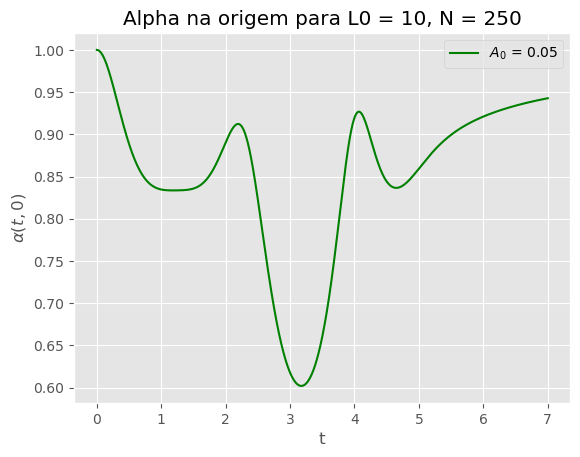

In [412]:
# Searching for critical amplitude:

#Alpha_origin_disp = Alpha_origin
#Alpha_origin_collapse = Alpha_origin

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
#plt.plot(t1, Alpha_origin, color = "y", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para L0 = 10, N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
#plt.grid()
plt.legend()

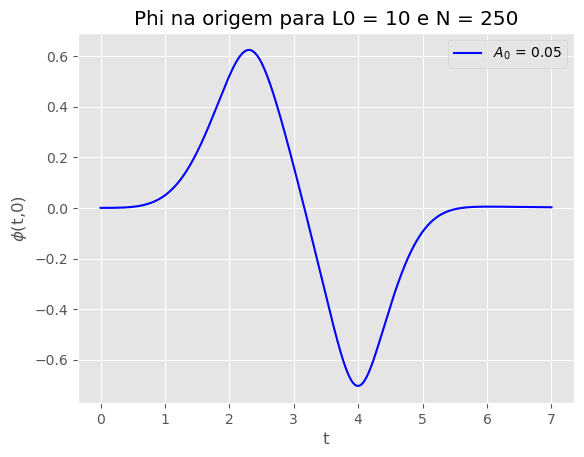

In [413]:


plt.plot(t1, phi_origin, color = "b", label = "$A_0$ = {:}".format(A0))
plt.title("Phi na origem para L0 = 10 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")  
#plt.grid()
plt.legend() 

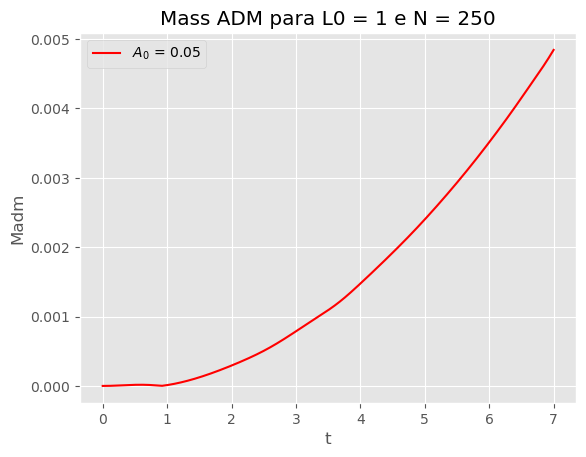

In [414]:
# Mass ADM error

Madm_error = abs(Madm - M0)/M0 * 100

plt.plot(t1, Madm_error, color = "r", label = "$A_0$ = {:}".format(A0))
plt.title("Mass ADM para L0 = 1 e N = {:}".format(N) )
plt.ylabel("Madm")
plt.xlabel("t")  
#plt.yscale('log')
#plt.grid()
plt.legend() 

Text(0.5, 0, 't')

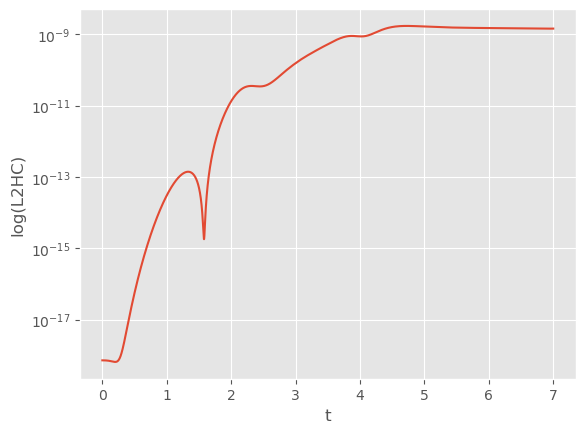

In [415]:
# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2HC,label = "$A_0$ = {:}".format(A0))
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
#plt.grid()
#plt.title("log(L2Hc) para $N = 50$, $L_0 = 2$")

Text(0.5, 1.0, 'log(L2MC) para $N = 50$, $L_0 = 2$')

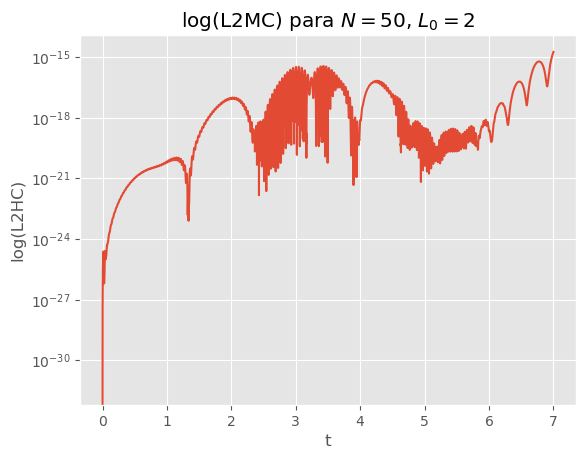

In [416]:
# Erro L2 of momentum constraint

plt.plot(t1,L2MC,label = "$A_0$ = {:}".format(A0))
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
#plt.grid()
plt.title("log(L2MC) para $N = 50$, $L_0 = 2$")

In [417]:
# Code convergency:

# N = 50
  
#L2HC_50_L02 = max(L2HC)
#Madm_50_L02 = max(Madm_error)

#L2HC_50_L05 = max(L2HC)
#Madm_50_L05 = max(Madm_error)

#L2HC_50_L010 = max(L2HC)
#Madm_50_L010 = max(Madm_error)

#L2HC_50_L02 = 2.1004761975300013e-05
#L2HC_50_L05 = 6.013179489999039e-08
#L2HC_50_L010 = 1.1172826826615396e-05

#Madm_50_L02 = 0.441140502315545
#Madm_50_L05 = 0.09577612248383582
#Madm_50_L010 = 1.9648638162904044


In [419]:
# Code convergency for momentum contraint:

#L2MC_50_L02 = max(L2MC)
#L2MC_50_L05 = max(L2MC)
#L2MC_50_L010 = max(L2MC)

#L2MC_100_L02 = max(L2MC)
#L2MC_100_L05 = max(L2MC)
#L2MC_100_L010 = max(L2MC)

#L2MC_150_L02 = max(L2MC)
#L2MC_150_L05 = max(L2MC)
#L2MC_150_L010 = max(L2MC)

L2MC_200_L02 = max(L2MC)
#L2MC_200_L05 = max(L2MC)
#L2MC_200_L010 = max(L2MC)

#L2MC_250_L02 = max(L2MC)
#L2MC_250_L05 = max(L2MC)
#L2MC_250_L010 = max(L2MC)

In [420]:
max(L2MC)

1.829947366837335e-15

In [352]:
#print('L2HC_50_L02 =',L2HC_50_L02,'L2HC_50_L05 =', L2HC_50_L05, 'L2HC_50_L010 =',L2HC_50_L010, sep = '\n')

In [383]:
print('L2MC_50_L02 =',L2MC_50_L02,'L2MC_50_L05 =', L2MC_50_L05, 'L2MC_50_L010 =',L2MC_50_L010,'L2MC_100_L02 =',L2MC_100_L02,'L2MC_100_L05 =', L2MC_100_L05, 'L2MC_100_L010 =',L2MC_100_L010,'L2MC_150_L02 =',L2MC_150_L02,'L2MC_150_L05 =', L2MC_150_L05, 'L2MC_150_L010 =',L2MC_150_L010,'L2MC_200_L02 =',L2MC_200_L02,'L2MC_200_L05 =', L2MC_200_L05, 'L2MC_200_L010 =',L2MC_200_L010, 'L2MC_250_L02 =',L2MC_250_L02,'L2MC_250_L05 =', L2MC_250_L05, 'L2MC_250_L010 =',L2MC_250_L010, sep = '\n')

L2MC_50_L02 =
9.948451859570199e-08
L2MC_50_L05 =
2.9125397491818546e-09
L2MC_50_L010 =
1.7474823330233952e-06
L2MC_100_L02 =
1.2640041104355755e-08
L2MC_100_L05 =
5.388562870637281e-14
L2MC_100_L010 =
5.3818091265698474e-12
L2MC_150_L02 =
1.4194335185752212e-10
L2MC_150_L05 =
1.0975326051484133e-14
L2MC_150_L010 =
8.923244224847467e-14
L2MC_200_L02 =
1.0837305618663566e-12
L2MC_200_L05 =
3.4751002673173925e-15
L2MC_200_L010 =
2.8366393867501416e-14
L2MC_250_L02 =
1.829947366837335e-15
L2MC_250_L05 =
1.475251125913511e-15
L2MC_250_L010 =
1.1883633034709597e-14


In [16]:
#print('Madm_50_L02 =',Madm_50_L02,'Madm_50_L05 =', Madm_50_L05, 'Madm_50_L010 =',Madm_50_L010, sep = '\n')

Madm_50_L02 =
0.441140502315545
Madm_50_L05 =
0.09577612248383582
Madm_50_L010 =
1.9648638162904044


NameError: name 'fig' is not defined

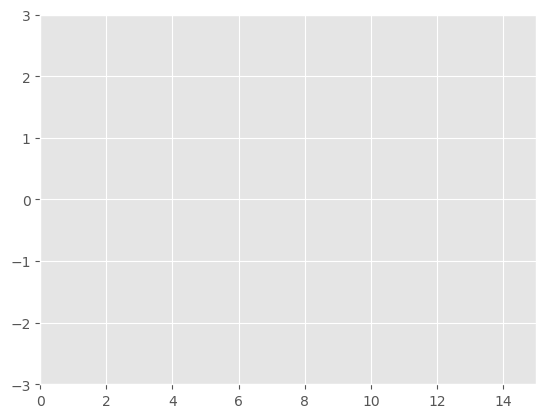

In [21]:
# Animation plot for Phi: Scalar Field
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#fig = plt.figure()
ax = plt.axes(xlim=(0, 15),ylim = (-3, 3))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
x = rplot

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)

HTML(anim.to_html5_video())

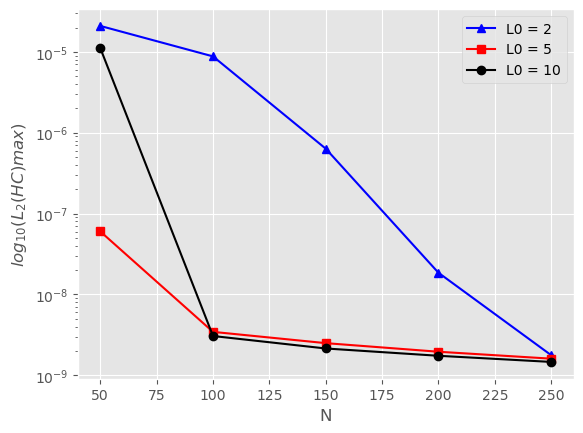

In [22]:
# Numerical test: L2 error of maximum Hamiltonian Constraint:

L2HC_100_L02 = 8.814519907496297e-06
L2HC_100_L05 = 3.4394575424068816e-09
L2HC_100_L010 = 3.0564279217470172e-09

L2HC_150_L02 = 6.359510241420228e-07
L2HC_150_L05 = 2.4947150430446703e-09
L2HC_150_L010 = 2.143082770566478e-09

L2HC_200_L02 = 1.8530744361457076e-08
L2HC_200_L05 = 1.9525782903056324e-09
L2HC_200_L010 = 1.7400678124385104e-09

L2HC_250_L02 = 1.7695663308139024e-09
L2HC_250_L05 = 1.602765664238964e-09
L2HC_250_L010 = 1.461023370063736e-09


L2HC_L02 = [L2HC_50_L02, L2HC_100_L02, L2HC_150_L02, L2HC_200_L02, L2HC_250_L02]

L2HC_L05 = [L2HC_50_L05, L2HC_100_L05, L2HC_150_L05, L2HC_200_L05, L2HC_250_L05]

L2HC_L010 = [L2HC_50_L010, L2HC_100_L010, L2HC_150_L010, L2HC_200_L010, L2HC_250_L010]

N = [50,100,150,200,250]

N_max = 250

plt.plot(N, L2HC_L02, '-b^', label = "L0 = 2")
plt.plot(N, L2HC_L05, '-rs',label = "L0 = 5")
plt.plot(N, L2HC_L010, '-ko',label = "L0 = 10")
#plt.xticks(range(N_max), N)
plt.xlabel('N')
plt.ylabel('$log_{10}(L_2(HC)max)$')
plt.yscale('log')
#plt.grid()
plt.legend()
plt.show()

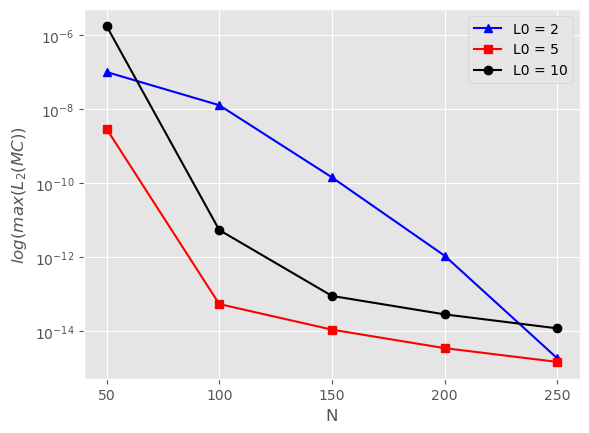

In [398]:
# Numerical test: L2 error of maximum Hamiltonian Constraint:

L2MC_50_L02 = 9.948451859570199e-08
L2MC_50_L05 =2.9125397491818546e-09
L2MC_50_L010 =1.7474823330233952e-06
L2MC_100_L02 =1.2640041104355755e-08
L2MC_100_L05 =5.388562870637281e-14
L2MC_100_L010 =5.3818091265698474e-12
L2MC_150_L02 =1.4194335185752212e-10
L2MC_150_L05 =1.0975326051484133e-14
L2MC_150_L010 =8.923244224847467e-14
L2MC_200_L02 =1.0837305618663566e-12
L2MC_200_L05 =3.4751002673173925e-15
L2MC_200_L010 =2.8366393867501416e-14
L2MC_250_L02 =1.829947366837335e-15
L2MC_250_L05 =1.475251125913511e-15
L2MC_250_L010 =1.1883633034709597e-14


L2MC_L02 = [L2MC_50_L02, L2MC_100_L02, L2MC_150_L02, L2MC_200_L02, L2MC_250_L02]

L2MC_L05 = [L2MC_50_L05, L2MC_100_L05, L2MC_150_L05, L2MC_200_L05, L2MC_250_L05]

L2MC_L010 = [L2MC_50_L010, L2MC_100_L010, L2MC_150_L010, L2MC_200_L010, L2MC_250_L010]

Ns = [50,100,150,200,250]



plt.plot(Ns, L2MC_L02, '-b^', label = "L0 = 2")
plt.plot(Ns, L2MC_L05, '-rs',label = "L0 = 5")
plt.plot(Ns, L2MC_L010, '-ko',label = "L0 = 10")
plt.xticks(Ns)
plt.xlabel('N')
plt.ylabel('$log(max(L_2(MC))$')
plt.yscale('log')
#plt.grid()
plt.legend()
plt.show()

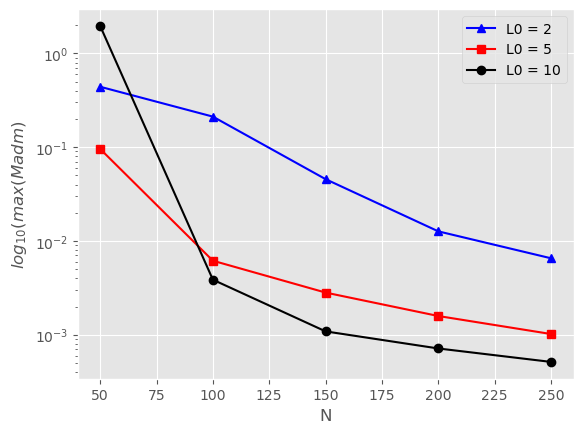

In [23]:
# Numerical test: L2 error of maximum Hamiltonian Constraint:

Madm_100_L02 = 0.21181940792191017
Madm_100_L05 = 0.006155383363121455
Madm_100_L010 = 0.0038618820102352893

Madm_150_L02 = 0.04560284588841929
Madm_150_L05 = 0.00281517011908434
Madm_150_L010 = 0.001085434551372218

Madm_200_L02 = 0.012656089955980498
Madm_200_L05 = 0.0015831036037497331
Madm_200_L010 = 0.0007135406063858518

Madm_250_L02 = 0.006533997751603586
Madm_250_L05 = 0.001017385966569618
Madm_250_L010 = 0.0005128561636363929

Madm_L02 = [Madm_50_L02, Madm_100_L02, Madm_150_L02, Madm_200_L02, Madm_250_L02]

Madm_L05 = [Madm_50_L05, Madm_100_L05, Madm_150_L05, Madm_200_L05, Madm_250_L05]

Madm_L010 = [Madm_50_L010, Madm_100_L010, Madm_150_L010, Madm_200_L010, Madm_250_L010]

N = [50,100,150,200,250]

N_max = 250

plt.plot(N, Madm_L02, '-b^', label = "L0 = 2")
plt.plot(N, Madm_L05, '-rs',label = "L0 = 5")
plt.plot(N, Madm_L010, '-ko',label = "L0 = 10")
#plt.xticks(range(N_max), N)
plt.xlabel('N')
plt.ylabel('$log_{10}(max(Madm)$')
plt.yscale('log')
#plt.grid()
plt.legend()
plt.show()